In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install -r """/content/drive/MyDrive/LSM_upgrad_case study/requirements.txt"""

In [ ]:
#importing libraries

import warnings
warnings.filterwarnings("ignore")
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import gridspec
import plotly.express as px
from pandas import plotting
import missingno as ms
from sklearn.impute import SimpleImputer
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from visualizer import Visualizer
from fancyimpute import KNN
from sklearn.preprocessing import OrdinalEncoder
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import StandardScaler
from itertools import product
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import mutual_info_classif

In [ ]:
plt.style.use("ggplot") #setting the plot style

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/LSM_upgrad_case study/Lead.csv")

In [ ]:
df.shape

(9240, 37)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

- **Dataset Overview:**
  - 4 columns with floating-point values.
  - 3 columns with integer values.
  - 30 columns containing categorical values.

<Axes: title={'center': 'Null Values Plot'}>

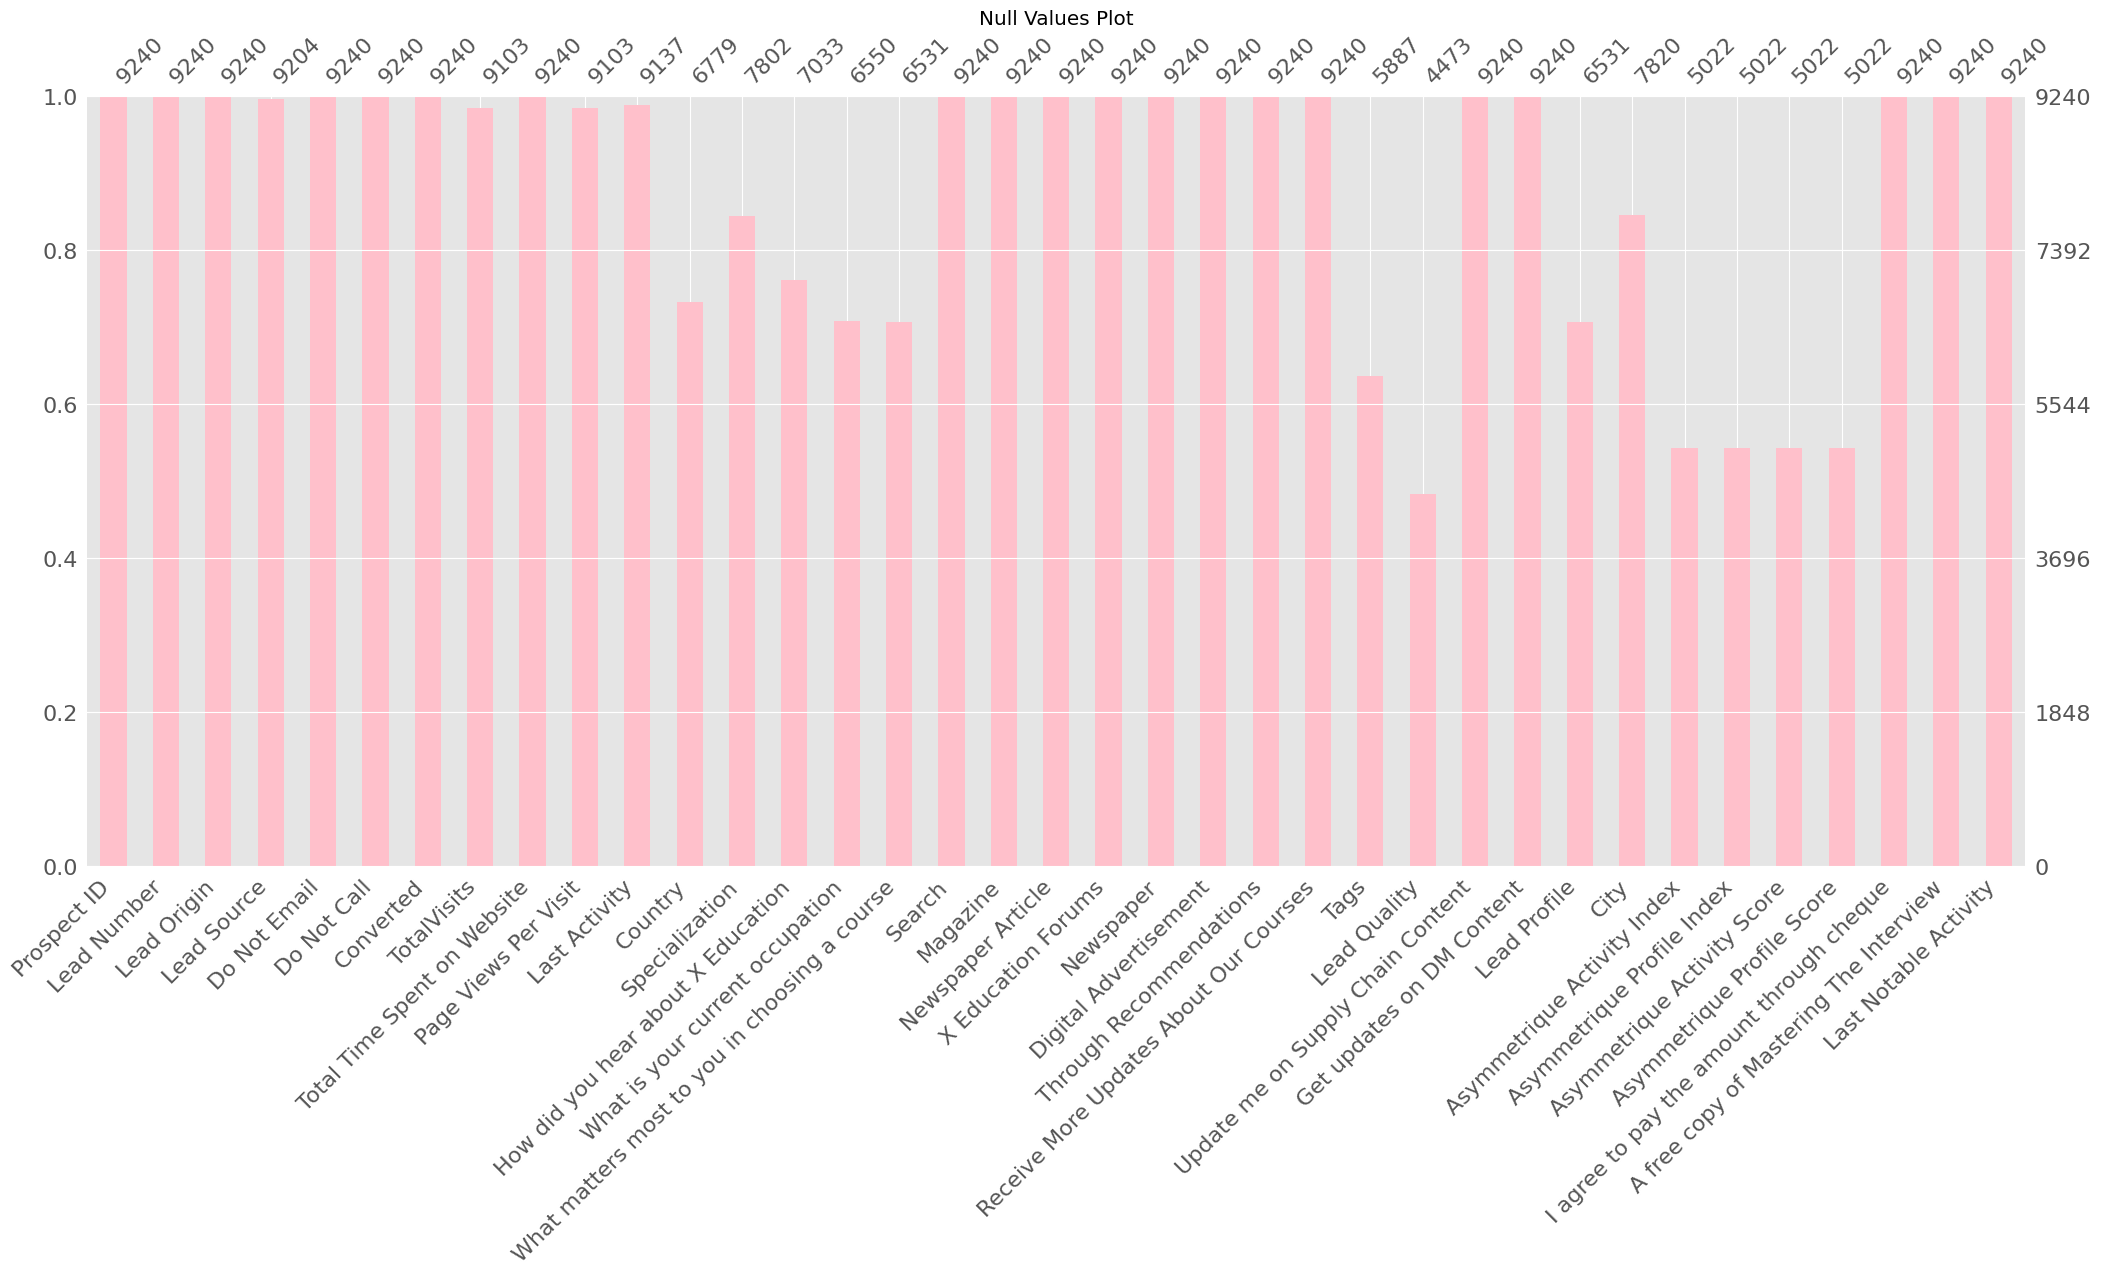

In [ ]:
plt.title("Null Values Plot")
ms.bar(df, color = 'Pink')

In [ ]:
df.isnull().mean().sort_values(ascending=False) * 100


Lead Quality                                     51.590909
Asymmetrique Activity Index                      45.649351
Asymmetrique Profile Score                       45.649351
Asymmetrique Activity Score                      45.649351
Asymmetrique Profile Index                       45.649351
Tags                                             36.287879
Lead Profile                                     29.318182
What matters most to you in choosing a course    29.318182
What is your current occupation                  29.112554
Country                                          26.634199
How did you hear about X Education               23.885281
Specialization                                   15.562771
City                                             15.367965
Page Views Per Visit                              1.482684
TotalVisits                                       1.482684
Last Activity                                     1.114719
Lead Source                                       0.3896

In [ ]:
num_col = df.select_dtypes(include=['int64', 'float64']).columns


In [ ]:
cat_col = df.select_dtypes(exclude=['int64', 'float64']).columns


In [ ]:
cat_col

Index(['Prospect ID', 'Lead Origin', 'Lead Source', 'Do Not Email',
       'Do Not Call', 'Last Activity', 'Country', 'Specialization',
       'How did you hear about X Education', 'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [ ]:
num_df = df[num_col]
cat_df = df[cat_col]

### Numerical Data Feature Enginnering

In [ ]:
num_df

Lead Number  Converted  TotalVisits  Total Time Spent on Website  \
0          660737          0          0.0                            0   
1          660728          0          5.0                          674   
2          660727          1          2.0                         1532   
3          660719          0          1.0                          305   
4          660681          1          2.0                         1428   
...           ...        ...          ...                          ...   
9235       579564          1          8.0                         1845   
9236       579546          0          2.0                          238   
9237       579545          0          2.0                          199   
9238       579538          1          3.0                          499   
9239       579533          1          6.0                         1279   

      Page Views Per Visit  Asymmetrique Activity Score  \
0                     0.00                         15.0   
1                     2.50                         15.0   
2                     2.00                         14.0   
3                     1.00                         13.0   
4                     1.00                         15.0   
...                    ...                          ...   
9235                  2.67                         15.0   
9236                  2.00                         14.0   
9237                  2.00                         13.0   
9238                  3.00                         15.0   
9239                  3.00                         15.0   

      Asymmetrique Profile Score  
0                           15.0  
1                           15.0  
2                           20.0  
3                           17.0  
4                           18.0  
...                          ...  
9235                        17.0  
9236                        19.0  
9237                        20.0  
9238                        16.0  
9239                        18.0  

[9240 rows x 7 columns]

In [ ]:
num_df.isnull().mean().sort_values(ascending=False) * 100


Asymmetrique Activity Score    45.649351
Asymmetrique Profile Score     45.649351
TotalVisits                     1.482684
Page Views Per Visit            1.482684
Lead Number                     0.000000
Converted                       0.000000
Total Time Spent on Website     0.000000
dtype: float64

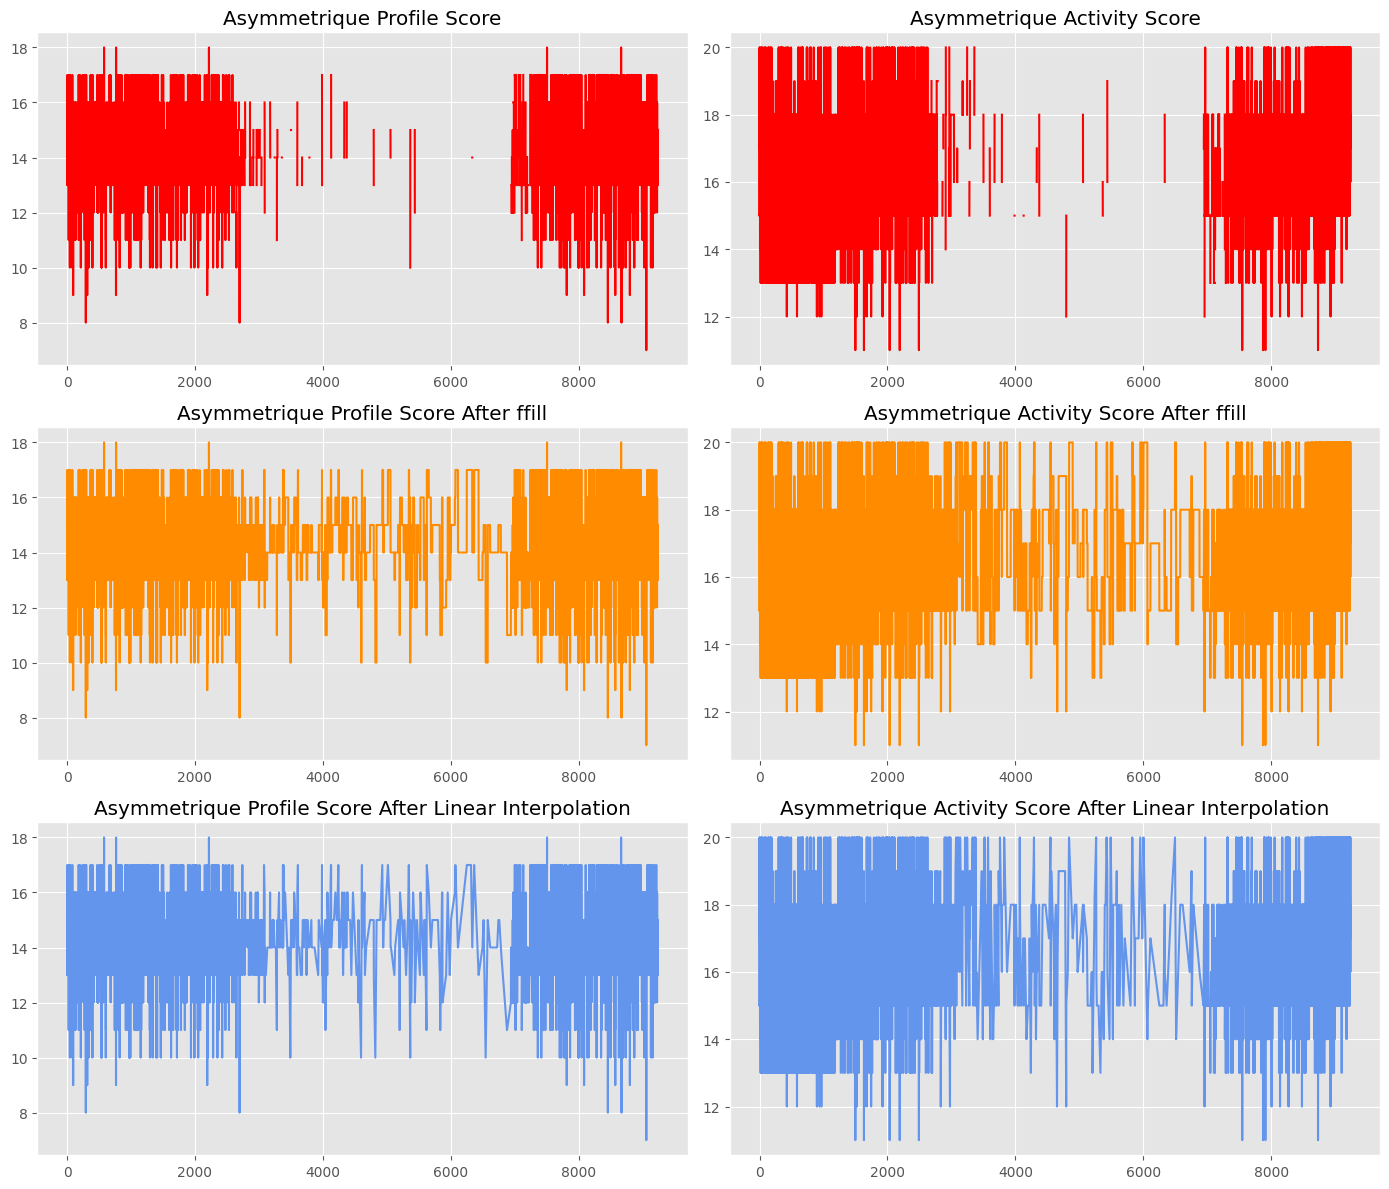

In [ ]:

def plot_scores(data, column_index, title, color):
    plt.plot(data.iloc[:, column_index], color=color)
    plt.title(title)

plt.figure(figsize=(14, 12))

plt.subplot(321)
plot_scores(num_df, 5, "Asymmetrique Profile Score", 'r')

plt.subplot(322)
plot_scores(num_df, 6, "Asymmetrique Activity Score", 'r')

plt.subplot(323)
plot_scores(num_df.fillna(method='ffill'), 5, "Asymmetrique Profile Score After ffill", 'darkorange')

plt.subplot(324)
plot_scores(num_df.fillna(method='ffill'), 6, "Asymmetrique Activity Score After ffill", 'darkorange')

plt.subplot(325)
plot_scores(num_df.interpolate(), 5, "Asymmetrique Profile Score After Linear Interpolation", 'cornflowerblue')

plt.subplot(326)
plot_scores(num_df.interpolate(), 6, "Asymmetrique Activity Score After Linear Interpolation", 'cornflowerblue')

plt.tight_layout()
plt.show()


- **Handling Null Values:**
  - Exercise caution with imputing or interpolating data.
  - Consider excluding columns with a substantial number of missing entries.
  - Mitigate potential randomness and bias by adopting a prudent strategy.

In [ ]:
se_median = SimpleImputer(missing_values = np.nan, strategy='median')

In [ ]:
num_df[['TotalVisits', 'Page Views Per Visit']] = se_median.fit_transform(num_df[['TotalVisits', 'Page Views Per Visit']])

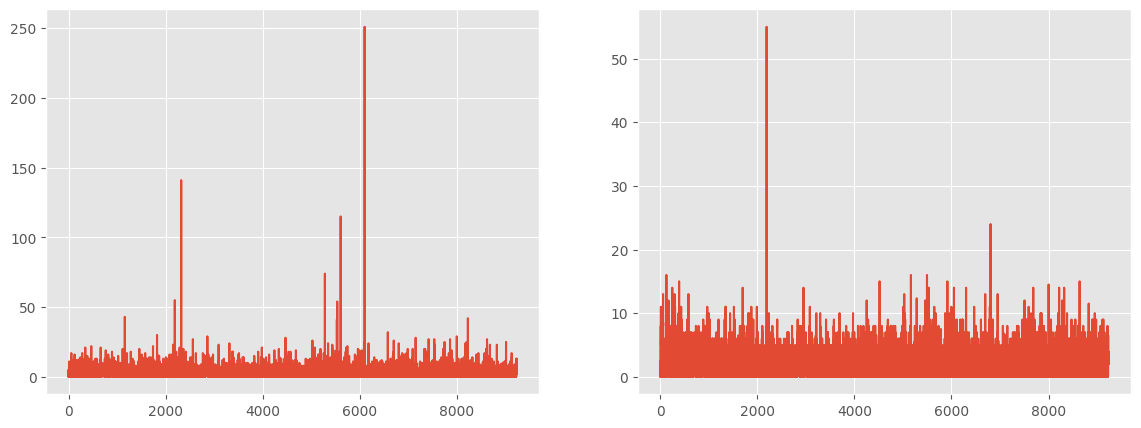

In [ ]:
plt.figure(figsize=(14,5))
plt.subplot(121)
plt.plot(num_df['TotalVisits'])
plt.subplot(122)
plt.plot(num_df['Page Views Per Visit'])

In [ ]:
num_df.isnull().sum()

Lead Number                       0
Converted                         0
TotalVisits                       0
Total Time Spent on Website       0
Page Views Per Visit              0
Asymmetrique Activity Score    4218
Asymmetrique Profile Score     4218
dtype: int64

In [ ]:
num_df = num_df.drop(['Asymmetrique Activity Score', 'Asymmetrique Profile Score'], axis = 1)

In [ ]:
#The columns selected for our analysis will include those containing numerical values from the final dataset.
num_df.isnull().sum()

Lead Number                    0
Converted                      0
TotalVisits                    0
Total Time Spent on Website    0
Page Views Per Visit           0
dtype: int64

### Categorical Data Feature Engineering and analysis

In [ ]:
(cat_df.isnull().mean() * 100).sort_values(ascending=False)


Lead Quality                                     51.590909
Asymmetrique Activity Index                      45.649351
Asymmetrique Profile Index                       45.649351
Tags                                             36.287879
Lead Profile                                     29.318182
What matters most to you in choosing a course    29.318182
What is your current occupation                  29.112554
Country                                          26.634199
How did you hear about X Education               23.885281
Specialization                                   15.562771
City                                             15.367965
Last Activity                                     1.114719
Lead Source                                       0.389610
I agree to pay the amount through cheque          0.000000
A free copy of Mastering The Interview            0.000000
Get updates on DM Content                         0.000000
Update me on Supply Chain Content                 0.0000

In [ ]:
cat_null_cols = cat_df.isnull().mean().sort_values(ascending=False).head(13).index


In [ ]:
#Create a function that iterates through each value, checks for the data type, and returns a notification if any integer or float values are encountered.

def check_str(data, col):

    for i in data[col]:
        if isinstance(i, str):
            continue
        else:
            print("Float/Int Values Found in Categorical Column..!!!")
            break

In [ ]:
check_str(cat_df[cat_null_cols], 'Lead Quality')

Float/Int Values Found in Categorical Column..!!!


In [ ]:
check_str(cat_df[cat_null_cols].fillna(value = str(np.nan)), 'Lead Quality')

In [ ]:
cat_df[cat_null_cols].isnull().sum()

Lead Quality                                     4767
Asymmetrique Activity Index                      4218
Asymmetrique Profile Index                       4218
Tags                                             3353
Lead Profile                                     2709
What matters most to you in choosing a course    2709
What is your current occupation                  2690
Country                                          2461
How did you hear about X Education               2207
Specialization                                   1438
City                                             1420
Last Activity                                     103
Lead Source                                        36
dtype: int64

In [ ]:
new_cat_df = cat_df[cat_null_cols]

In [ ]:
new_cat_df.isnull().mean() * 100


Lead Quality                                     51.590909
Asymmetrique Activity Index                      45.649351
Asymmetrique Profile Index                       45.649351
Tags                                             36.287879
Lead Profile                                     29.318182
What matters most to you in choosing a course    29.318182
What is your current occupation                  29.112554
Country                                          26.634199
How did you hear about X Education               23.885281
Specialization                                   15.562771
City                                             15.367965
Last Activity                                     1.114719
Lead Source                                       0.389610
dtype: float64

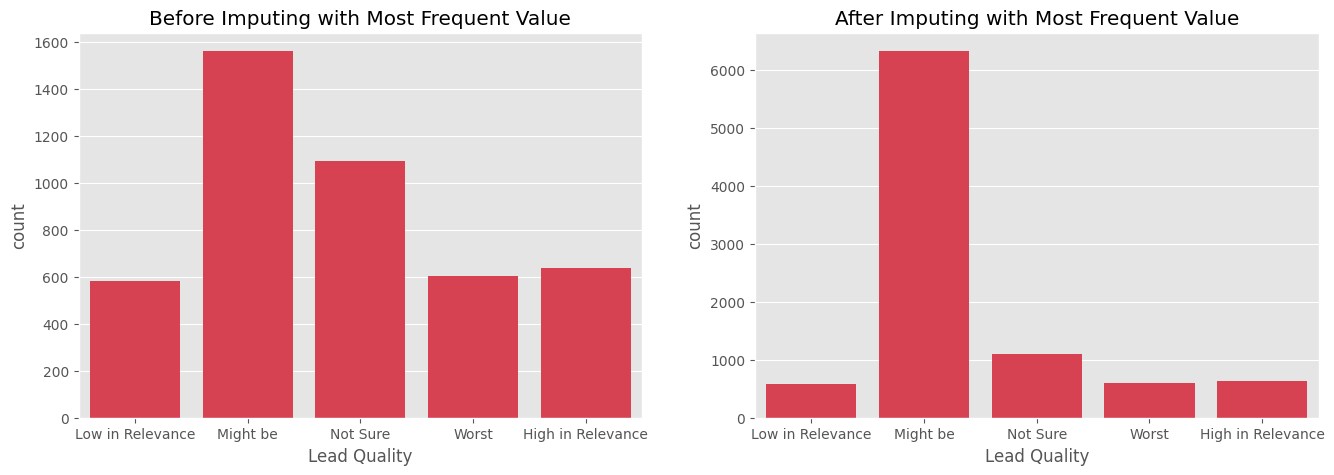

In [ ]:
plt.figure(figsize=(16, 5))

# Before Imputing
plt.subplot(121)
plt.title("Before Imputing with Most Frequent Value")
sns.countplot(data=new_cat_df, x='Lead Quality', color='#ee2a3e')

# After Imputing
most_frequent_value = new_cat_df['Lead Quality'].mode()[0]
imputed_df = new_cat_df.fillna(value=most_frequent_value)

plt.subplot(122)
plt.title("After Imputing with Most Frequent Value")
sns.countplot(data=imputed_df, x='Lead Quality', color='#ee2a3e')

plt.show()



In the 'Lead Quality' case, imputing 'NaN' values with the most frequent value is unsuitable as it leads to class imbalance in the column data. Consequently, an alternative strategy must be devised to address the issue of missing values without compromising class distribution.

In [ ]:
new_cat_df.head()

Lead Quality Asymmetrique Activity Index Asymmetrique Profile Index  \
0  Low in Relevance                   02.Medium                  02.Medium   
1               NaN                   02.Medium                  02.Medium   
2          Might be                   02.Medium                    01.High   
3          Not Sure                   02.Medium                    01.High   
4          Might be                   02.Medium                    01.High   

                                  Tags    Lead Profile  \
0          Interested in other courses          Select   
1                              Ringing          Select   
2  Will revert after reading the email  Potential Lead   
3                              Ringing          Select   
4  Will revert after reading the email          Select   

  What matters most to you in choosing a course  \
0                       Better Career Prospects   
1                       Better Career Prospects   
2                       Better Career Prospects   
3                       Better Career Prospects   
4                       Better Career Prospects   

  What is your current occupation Country How did you hear about X Education  \
0                      Unemployed     NaN                             Select   
1                      Unemployed   India                             Select   
2                         Student   India                             Select   
3                      Unemployed   India                      Word Of Mouth   
4                      Unemployed   India                              Other   

            Specialization    City            Last Activity     Lead Source  
0                   Select  Select  Page Visited on Website      Olark Chat  
1                   Select  Select             Email Opened  Organic Search  
2  Business Administration  Mumbai             Email Opened  Direct Traffic  
3    Media and Advertising  Mumbai              Unreachable  Direct Traffic  
4                   Select  Mumbai        Converted to Lead          Google

To comprehend the presence of null values in our data, we should investigate the underlying reasons. This analysis will enable us to discern the columns that can be safely omitted from our dataset and identify those suitable for the imputation process.

In [ ]:
new_cat_df.isnull().sum()

Lead Quality                                     4767
Asymmetrique Activity Index                      4218
Asymmetrique Profile Index                       4218
Tags                                             3353
Lead Profile                                     2709
What matters most to you in choosing a course    2709
What is your current occupation                  2690
Country                                          2461
How did you hear about X Education               2207
Specialization                                   1438
City                                             1420
Last Activity                                     103
Lead Source                                        36
dtype: int64

In [ ]:
cat_df[(cat_df['Lead Source'].isnull())][['Lead Origin', 'Lead Source', 'Last Activity', 'City', 'Specialization', 'Country', 'Tags']]

Lead Origin Lead Source  Last Activity  \
836             Lead Add Form         NaN  Email Bounced   
1569            Lead Add Form         NaN       SMS Sent   
1746            Lead Add Form         NaN       SMS Sent   
2020            Lead Add Form         NaN       SMS Sent   
2025            Lead Add Form         NaN       SMS Sent   
2152            Lead Add Form         NaN       SMS Sent   
2346            Lead Add Form         NaN       SMS Sent   
2544              Lead Import         NaN   Email Opened   
2601           Quick Add Form         NaN  Email Bounced   
2676            Lead Add Form         NaN       SMS Sent   
3028            Lead Add Form         NaN       SMS Sent   
3266  Landing Page Submission         NaN       SMS Sent   
3268            Lead Add Form         NaN       SMS Sent   
3928            Lead Add Form         NaN  Email Bounced   
3945            Lead Add Form         NaN       SMS Sent   
4406            Lead Add Form         NaN       SMS Sent   
4409            Lead Add Form         NaN   Email Opened   
4605            Lead Add Form         NaN  Email Bounced   
4653            Lead Add Form         NaN       SMS Sent   
4804            Lead Add Form         NaN   Email Opened   
4831            Lead Add Form         NaN       SMS Sent   
4843            Lead Add Form         NaN       SMS Sent   
5253            Lead Add Form         NaN       SMS Sent   
5621            Lead Add Form         NaN       SMS Sent   
5840            Lead Add Form         NaN            NaN   
5960            Lead Add Form         NaN       SMS Sent   
6124            Lead Add Form         NaN       SMS Sent   
7302            Lead Add Form         NaN  Email Bounced   
7306            Lead Add Form         NaN       SMS Sent   
7525            Lead Add Form         NaN   Unsubscribed   
7847            Lead Add Form         NaN            NaN   
8092            Lead Add Form         NaN   Email Opened   
8118            Lead Add Form         NaN       SMS Sent   
8276            Lead Add Form         NaN   Email Opened   
8490            Lead Add Form         NaN       SMS Sent   
9160            Lead Add Form         NaN   Unsubscribed   

                             City             Specialization Country  \
836                        Select                     Select     NaN   
1569                       Select                     Select     NaN   
1746                       Select                     Select     NaN   
2020                       Select                     Select     NaN   
2025                       Select                     Select     NaN   
2152                       Select                     Select     NaN   
2346                       Select                     Select     NaN   
2544                       Select                     Select     NaN   
2601           Other Metro Cities                 E-COMMERCE     NaN   
2676  Other Cities of Maharashtra  Human Resource Management     NaN   
3028                       Select      Operations Management     NaN   
3266                       Mumbai         Finance Management   India   
3268                       Select                     Select     NaN   
3928                       Select                     Select     NaN   
3945                       Select                     Select     NaN   
4406                       Select                     Select     NaN   
4409                       Select                     Select     NaN   
4605                       Select                     Select     NaN   
4653                       Select                     Select     NaN   
4804                       Select                     Select     NaN   
4831                       Select                     Select     NaN   
4843                       Select                     Select     NaN   
5253                       Select                     Select     NaN   
5621            Thane & Outskirts         Finance Management     NaN 

- Null values in 'Lead Source' are attributed to non-mandatory fields in the user interface.
- Entries from 'Lead Add Form,' 'Quick Add Form,' and 'Landing Page Submission' often have null values in the 'Lead Source' column.
- Analysis of associated 'Tags' provides an indication that individuals with null 'Lead Source' entries may be uninterested or busy, affecting their responsiveness to communication.

In [ ]:
(cat_df[(cat_df['Last Activity'].isnull())][['Lead Origin', 'Lead Source', 'Last Activity', 'City', 'Specialization', 'Country', 'Tags']]).head(40)

Lead Origin       Lead Source Last Activity  \
77    Lead Add Form  Welingak Website           NaN   
79    Lead Add Form         Reference           NaN   
81    Lead Add Form  Welingak Website           NaN   
88    Lead Add Form         Reference           NaN   
120   Lead Add Form         Reference           NaN   
133   Lead Add Form         Reference           NaN   
134   Lead Add Form  Welingak Website           NaN   
177   Lead Add Form  Welingak Website           NaN   
179   Lead Add Form  Welingak Website           NaN   
180   Lead Add Form  Welingak Website           NaN   
212   Lead Add Form         Reference           NaN   
267   Lead Add Form         Reference           NaN   
269   Lead Add Form         Reference           NaN   
299   Lead Add Form         Reference           NaN   
348   Lead Add Form         Reference           NaN   
364   Lead Add Form         Reference           NaN   
369   Lead Add Form         Reference           NaN   
470   Lead Add Form         Reference           NaN   
585     Lead Import          Facebook           NaN   
587     Lead Import          Facebook           NaN   
589     Lead Import          Facebook           NaN   
590     Lead Import          Facebook           NaN   
591     Lead Import          Facebook           NaN   
592     Lead Import          Facebook           NaN   
593     Lead Import          Facebook           NaN   
596     Lead Import          Facebook           NaN   
597     Lead Import          Facebook           NaN   
598     Lead Import          Facebook           NaN   
601     Lead Import          Facebook           NaN   
603     Lead Import          Facebook           NaN   
631   Lead Add Form         Reference           NaN   
949   Lead Add Form  Welingak Website           NaN   
994   Lead Add Form  Welingak Website           NaN   
1099  Lead Add Form         Reference           NaN   
1136    Lead Import          Facebook           NaN   
1137    Lead Import          Facebook           NaN   
1145    Lead Import          Facebook           NaN   
1249  Lead Add Form         Reference           NaN   
1258  Lead Add Form         Reference           NaN   
1393  Lead Add Form  Welingak Website           NaN   

                             City                     Specialization Country  \
77                         Select                             Select     NaN   
79              Thane & Outskirts             Hospitality Management     NaN   
81                         Select                             Select     NaN   
88                         Mumbai          Human Resource Management     NaN   
120                  Other Cities               Marketing Management     NaN   
133                        Select               Marketing Management     NaN   
134                        Select                             Select     NaN   
177                        Mumbai                             Select     NaN   
179                        Select                             Select     NaN   
180                        Select                             Select     NaN   
212                  Other Cities               Marketing Management     NaN   
267                        Select                             Select     NaN   
269   Other Cities of Maharashtra              Operations Management     NaN   
299                        Mumbai          Human Resource Management     NaN   
348                        Mumbai              Media and Advertising     NaN   
364                        Mumbai              Healthcare Management     NaN   
369                        Mumbai            Supply Chain Management     NaN   
470                        Select                 Finance Management     NaN   
585   Other Cities of Maharashtra                             Select     NaN   
587                        Mumbai                             Select     NaN   
589                        Mumbai                             Select    

Observations:

- Users who filled the form through 'Welingak Website,' 'Reference,' or 'Facebook' exhibit no registered activity.
- Inquiries regarding this lack of activity may be directed to the responsible party.
- Notably, leads from these sources often show closed or converted status in the associated tags, suggesting potential success in advancing to the next lead stage.

In [ ]:
(cat_df[(cat_df['Lead Quality'].isnull())][['Lead Quality', 'Lead Origin', 'Lead Source', 'Last Activity', 'City', 'Specialization', 'Country', 'Tags', 'Lead Profile']]).head(10)

Lead Quality              Lead Origin     Lead Source  \
1           NaN                      API  Organic Search   
5           NaN                      API      Olark Chat   
7           NaN                      API      Olark Chat   
8           NaN  Landing Page Submission  Direct Traffic   
9           NaN                      API          Google   
11          NaN  Landing Page Submission  Direct Traffic   
13          NaN  Landing Page Submission  Organic Search   
14          NaN  Landing Page Submission  Direct Traffic   
16          NaN                      API      Olark Chat   
18          NaN  Landing Page Submission          Google   

              Last Activity               City             Specialization  \
1              Email Opened             Select                     Select   
5   Olark Chat Conversation                NaN                        NaN   
7   Olark Chat Conversation                NaN                        NaN   
8              Email Opened  Thane & Outskirts     IT Projects Management   
9              Email Opened             Mumbai         Finance Management   
11  Page Visited on Website  Thane & Outskirts  Human Resource Management   
13             Email Opened  Thane & Outskirts    Business Administration   
14            Email Bounced             Select    Business Administration   
16  Olark Chat Conversation                NaN                        NaN   
18  Page Visited on Website             Mumbai       Marketing Management   

   Country          Tags Lead Profile  
1    India       Ringing       Select  
5      NaN           NaN          NaN  
7      NaN           NaN          NaN  
8    India           NaN          NaN  
9    India           NaN          NaN  
11   India  Lost to EINS       Select  
13   India       Ringing       Select  
14  Russia           NaN       Select  
16     NaN           NaN          NaN  
18   India           NaN       Select

Analysis of 'Lead Quality':

- The 'Lead Quality' column contains numerous NaN values.
- This could be attributed to missing information in other columns, hindering the CRM system's ability to assess or assign the 'Lead Quality.'
- Before drawing any conclusions, it is prudent to examine the subset of data where null values are absent in order to gain a clearer understanding.

In [ ]:
(cat_df[(~cat_df['Lead Quality'].isnull())][['Lead Quality', 'Lead Origin', 'Lead Source', 'Last Activity', 'City', 'Specialization', 'Country', 'Tags', 'Lead Profile']]).head(10)

Lead Quality              Lead Origin     Lead Source  \
0   Low in Relevance                      API      Olark Chat   
2           Might be  Landing Page Submission  Direct Traffic   
3           Not Sure  Landing Page Submission  Direct Traffic   
4           Might be  Landing Page Submission          Google   
6   Low in Relevance  Landing Page Submission          Google   
10          Might be  Landing Page Submission  Organic Search   
12          Might be                      API  Organic Search   
15          Might be                      API  Organic Search   
17          Might be                      API  Referral Sites   
19             Worst                      API  Organic Search   

              Last Activity                City           Specialization  \
0   Page Visited on Website              Select                   Select   
2              Email Opened              Mumbai  Business Administration   
3               Unreachable              Mumbai    Media and Advertising   
4         Converted to Lead              Mumbai                   Select   
6              Email Opened              Mumbai  Supply Chain Management   
10             Email Opened  Other Metro Cities       Travel and Tourism   
12             Email Opened              Select     Marketing Management   
15             Email Opened              Select                   Select   
17       Email Link Clicked              Select                   Select   
19  Page Visited on Website              Select                   Select   

   Country                                 Tags    Lead Profile  
0      NaN          Interested in other courses          Select  
2    India  Will revert after reading the email  Potential Lead  
3    India                              Ringing          Select  
4    India  Will revert after reading the email          Select  
6    India  Will revert after reading the email  Potential Lead  
10   India  Will revert after reading the email          Select  
12   India  Will revert after reading the email  Potential Lead  
15   India  Will revert after reading the email          Select  
17   India          Interested in other courses          Select  
19   India          Interested in other courses          Select

Observation:

- Upon scrutiny, it is evident that in instances where substantial information is available in other columns, the 'Lead Quality' has been successfully assigned to each prospect.
- This supports the notion that the absence of data in certain columns might be the underlying cause of the numerous NaN values in the 'Lead Quality' column.

In [ ]:
new_cat_df.isnull().sum()/new_cat_df.shape[0]

Lead Quality                                     0.515909
Asymmetrique Activity Index                      0.456494
Asymmetrique Profile Index                       0.456494
Tags                                             0.362879
Lead Profile                                     0.293182
What matters most to you in choosing a course    0.293182
What is your current occupation                  0.291126
Country                                          0.266342
How did you hear about X Education               0.238853
Specialization                                   0.155628
City                                             0.153680
Last Activity                                    0.011147
Lead Source                                      0.003896
dtype: float64

Strategy for Handling Null Values:

- Exclude columns with null values exceeding 40%, as imputing such values may introduce bias and exacerbate class imbalances in the model.
- Focus on imputing columns where null values fall below the defined threshold, ensuring a more targeted and effective approach to addressing missing data.

In [ ]:
temp_cat_df = new_cat_df.drop(["Lead Quality", "Asymmetrique Profile Index", "Asymmetrique Activity Index"], axis = 1)

In [ ]:
temp_cat_df.isnull().mean()


Tags                                             0.362879
Lead Profile                                     0.293182
What matters most to you in choosing a course    0.293182
What is your current occupation                  0.291126
Country                                          0.266342
How did you hear about X Education               0.238853
Specialization                                   0.155628
City                                             0.153680
Last Activity                                    0.011147
Lead Source                                      0.003896
dtype: float64

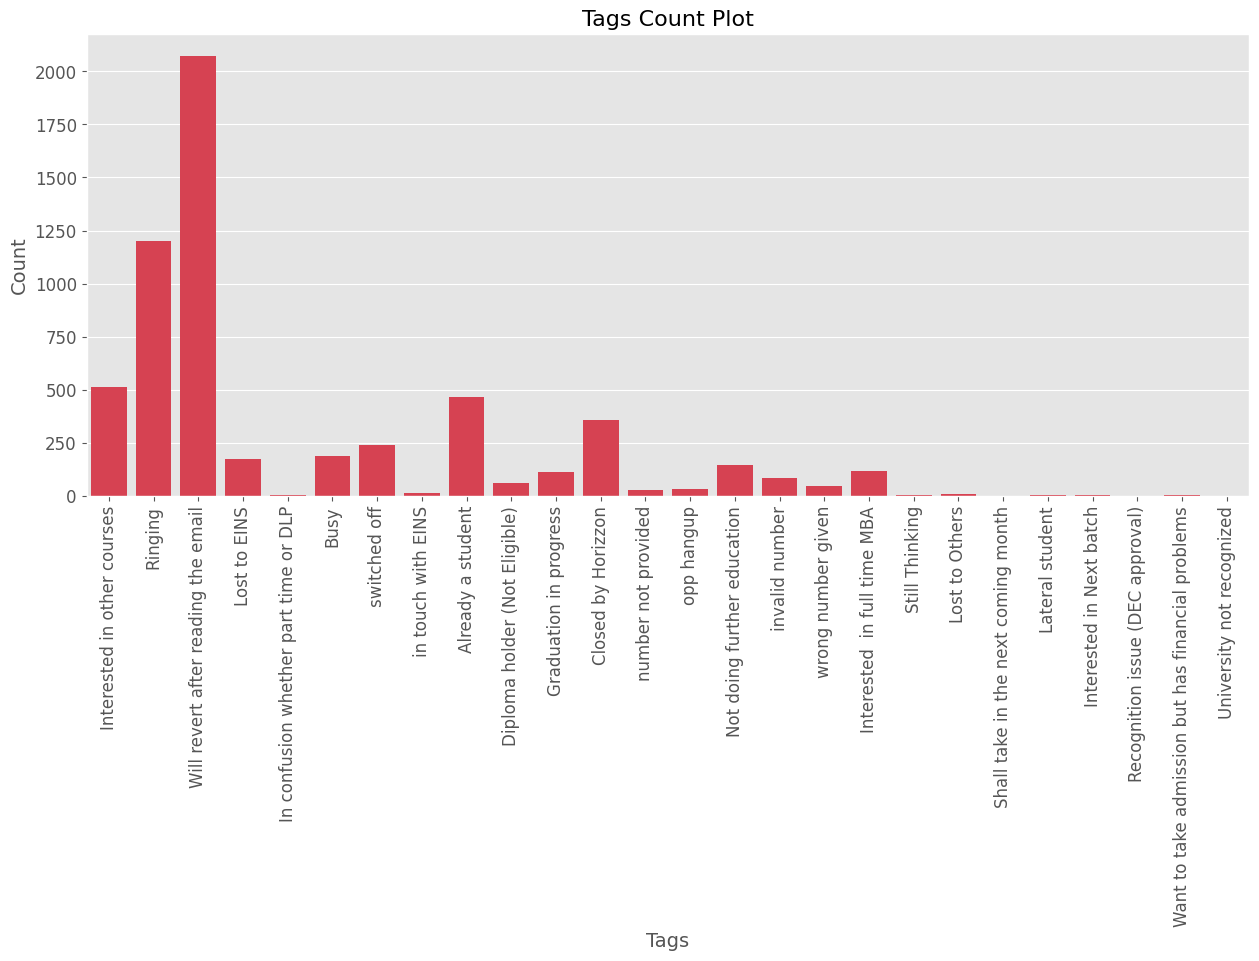

In [ ]:


plt.figure(figsize=(15, 6))
sns.countplot(data=temp_cat_df, x='Tags', palette=['#ee2a3e'])
plt.title('Tags Count Plot', fontsize=16)
plt.xticks(rotation='vertical', fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('Tags', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.show()


Observation on 'Tags' Column:

- The 'Tags' column exhibits a null value rate of 36%.
- A predominant response among individuals is "Will revert after reading the email."
- Some entries indicate that calls were unanswered, implying a potential reason for the null values in this column.

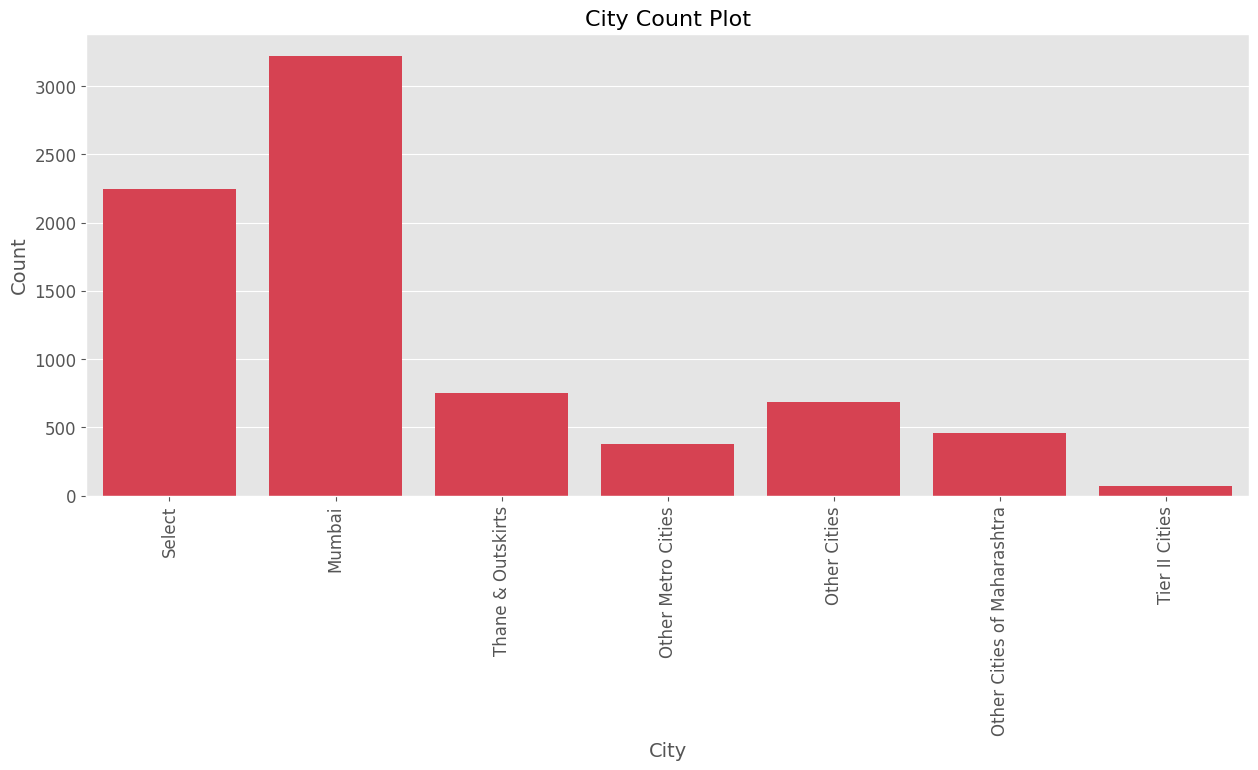

In [ ]:
plt.figure(figsize=(15, 6))
sns.countplot(data=temp_cat_df, x='City', palette=['#ee2a3e'])
plt.title('City Count Plot', fontsize=16)
plt.xticks(rotation='vertical', fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('City', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.show()


Observation on City Column:

- The City column contains approximately 15% null values.
- Despite a notable number of users filling the lead form hailing from "Mumbai," a substantial portion of individuals has left the city field unselected or null.

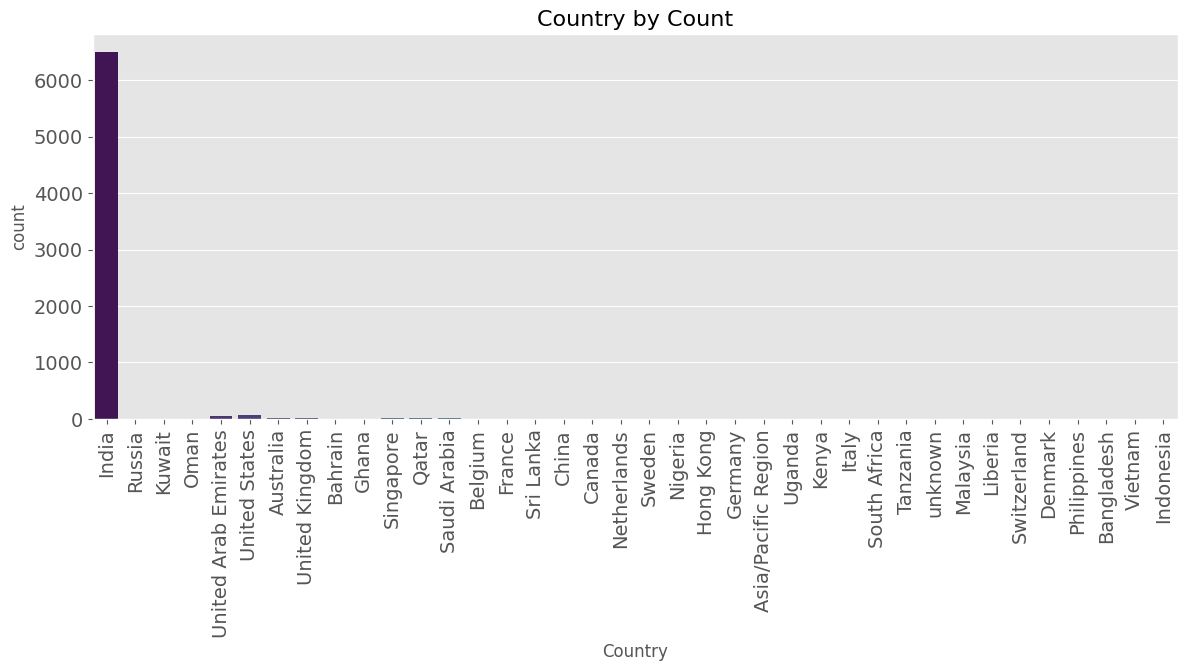

In [ ]:
plt.figure(figsize=(14, 5))
sns.countplot(data=temp_cat_df, x='Country', palette='viridis')
plt.title('Country by Count', fontsize=16)
plt.xticks(rotation='vertical', size=14)
plt.yticks(size=14)
plt.show()

Observation from Count Plot:

- The count plot indicates that the majority of the audience is from "India."

In [ ]:
px.pie(data_frame = temp_cat_df, names = 'Specialization', title = 'Specialization Distribution')

Observation on Specialization:

- The 'Specialization' column has approximately 16% null values.
- Around 21% of individuals have not selected a specialization.
- Notably, "Finance Management," "HR," and "Marketing Management" emerge as the most popular specializations among the users who provided this information.

In [ ]:
px.pie(data_frame = temp_cat_df, names = 'Lead Profile', title = 'Lead Profile Distribution')

Observation on Lead Profile Distribution:

- The 'Lead Profile' column contains 29.3% null values.
- A substantial percentage, approximately 45%, indicates that users have not selected a lead profile.

In [ ]:
px.histogram(data_frame = temp_cat_df, x = 'Lead Source', title = 'Lead Source Distribution')

Observation on Lead Source Distribution:

- "Google" stands out as the most popular lead source destination in our data.
- Following closely are "Direct Traffic," "Olark Chat," and "Organic Search."
- It's important to note that these observations exclude null values in the lead source column.

In [ ]:
px.histogram(data_frame = temp_cat_df, x = 'Last Activity', title = 'Last Activity Distribution')

In [ ]:
px.pie(temp_cat_df, 'What matters most to you in choosing a course', title = 'What matters most to you in choosing a course')

Key Motivation for Course Inquiry:

Predominantly, prospects filling the lead form express a common goal: "Better Career Prospects."
This aligns with the typical human aspiration for improved opportunities and career advancement.

In [ ]:
px.pie(temp_cat_df, 'What is your current occupation', title = 'What is your current occupation')

Observation on User Demographics:

A significant portion of form fillers identifies as "Unemployed."
There is notable interest from "Working Professionals" seeking to upskill for enhanced career opportunities.

In [ ]:
px.pie(data_frame = temp_cat_df, names = 'How did you hear about X Education', title = 'How did you hear about X Education')


Observation on User Acquisition Medium:

Excluding "not selected" and null values, the most popular user acquisition medium is "Online Search."
Following closely is "Word of Mouth," indicating that these mediums play a significant role in user acquisition.

### Categorical Data Feature Engineering


In [ ]:
idx = cat_df.columns[cat_df.isnull().sum() < 1]


In [ ]:
temp_cat_df = pd.concat([temp_cat_df, cat_df[idx]], axis = 1)

In [ ]:
#take a look at the null values

temp_cat_df.isnull().sum()

Tags                                             3353
Lead Profile                                     2709
What matters most to you in choosing a course    2709
What is your current occupation                  2690
Country                                          2461
How did you hear about X Education               2207
Specialization                                   1438
City                                             1420
Last Activity                                     103
Lead Source                                        36
Prospect ID                                         0
Lead Origin                                         0
Do Not Email                                        0
Do Not Call                                         0
Search                                              0
Magazine                                            0
Newspaper Article                                   0
X Education Forums                                  0
Newspaper                   

In [ ]:
#impute the Lead Source
temp_cat_df['Lead Source'].value_counts()

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64

Data Cleaning Action:

- Identify instances of the same lead source appearing under different names.
- Propose a consolidation of these instances to ensure data uniformity and accuracy.

In [ ]:
temp_cat_df['Lead Source'].replace(to_replace = 'google', value = 'Google', inplace = True)

In [ ]:
temp_cat_df['Lead Source'].value_counts()

Google               2873
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
Click2call              4
Social Media            2
Live Chat               2
Press_Release           2
Pay per Click Ads       1
blog                    1
WeLearn                 1
welearnblog_Home        1
youtubechannel          1
testone                 1
NC_EDM                  1
Name: Lead Source, dtype: int64

Data Imputation Strategy:

- After consolidating similar lead sources, introduce a new category labeled **"Others"** to encompass the 36 instances with null values.
- This approach ensures a comprehensive representation and addresses missing data in the lead source column.

In [ ]:
temp_cat_df['Lead Source'].replace(to_replace = np.nan, value = 'Others', inplace = True)

In [ ]:
temp_cat_df['Lead Source'].value_counts()

Google               2873
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
Others                 36
bing                    6
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64

Imputation Strategy for 'Last Activity' Column:

- Utilize the 'Tags' column, which exhibits a strong correlation with 'Last Activity.'
- Impute 'Last Activity' values based on the most frequent item observed in the corresponding 'Tags' entries.
- This approach leverages the relationship between the two columns to ensure meaningful imputation.

In [ ]:
temp_cat_df[temp_cat_df['Last Activity'].isnull()]

Tags     Lead Profile  \
77                                    NaN           Select   
79    Will revert after reading the email   Potential Lead   
81                                    NaN           Select   
88                     Closed by Horizzon  Lateral Student   
120                    Closed by Horizzon   Potential Lead   
...                                   ...              ...   
8097         Interested  in full time MBA           Select   
8107                         Lost to EINS   Potential Lead   
8434                   Closed by Horizzon           Select   
9015                   Closed by Horizzon   Potential Lead   
9087                   Closed by Horizzon   Potential Lead   

     What matters most to you in choosing a course  \
77                         Better Career Prospects   
79                         Better Career Prospects   
81                         Better Career Prospects   
88                         Better Career Prospects   
120                        Better Career Prospects   
...                                            ...   
8097                       Better Career Prospects   
8107                       Better Career Prospects   
8434                       Better Career Prospects   
9015                       Better Career Prospects   
9087                       Better Career Prospects   

     What is your current occupation Country  \
77                        Unemployed     NaN   
79              Working Professional     NaN   
81                        Unemployed     NaN   
88                        Unemployed     NaN   
120             Working Professional     NaN   
...                              ...     ...   
8097                      Unemployed     NaN   
8107            Working Professional     NaN   
8434                      Unemployed     NaN   
9015            Working Professional     NaN   
9087                      Unemployed     NaN   

     How did you hear about X Education                     Specialization  \
77                               Select                             Select   
79                               Select             Hospitality Management   
81                               Select                             Select   
88                               Select          Human Resource Management   
120                              Select               Marketing Management   
...                                 ...                                ...   
8097                             Select               Marketing Management   
8107                             Select  Banking, Investment And Insurance   
8434                             Select                             Select   
9015                             Select            Supply Chain Management   
9087                             Select                             Select   

                   City Last Activity       Lead Source  \
77               Select           NaN  Welingak Website   
79    Thane & Outskirts           NaN         Reference   
81               Select           NaN  Welingak Website   
88               Mumbai           NaN         Reference   
120        Other Cities           NaN         Reference   
...                 ...           ...               ...   
8097             Select           NaN         Reference   
8107             Select           NaN         Reference   
8434             Select           NaN         Reference   
9015             Mumbai           NaN         Reference   
9087             Select           NaN         Reference   

                               Prospect ID    Lead Origin Do Not Email  \
77    895d4905-f534-4f18-915b-8d239a72b5dc  Lead Add Form           No   
79    3a0ce10f-d2c1-4213-a2bc-4f97bcd29699  Lead Add Form           No   
81    277ad6a6-4565-4a18-a1ff-e46e03f22663  Lead Add Form           No   
88    68f496c2-0073-470f-9c3c-7fb48f060ce5  Lead Add Form           No   
120   144807db-2895-4002-b52e-3eda79c22395  Lead A

In [ ]:
temp_cat_df[temp_cat_df['Last Activity'].isnull()]['Tags'].value_counts()

Closed by Horizzon                     47
Will revert after reading the email    26
Ringing                                12
Interested in other courses             4
Lost to EINS                            2
number not provided                     1
Busy                                    1
Interested  in full time MBA            1
Name: Tags, dtype: int64

Imputation Process for 'Last Activity':

- Identify the most frequent item in the 'Last Activity' column based on the corresponding 'Tags' entries.
- Utilize this most frequent item to impute missing values in the 'Last Activity' column, ensuring consistency and relevance.

In [ ]:
tags_list = [
    'Closed by Horizzon',
    'Will revert after reading the email',
    'Ringing',
    'Interested in other courses',
    'number not provided',
    'Busy',
    'Interested in full time MBA'
]

for tag in tags_list:
    mode_value = temp_cat_df[temp_cat_df['Tags'] == tag]['Last Activity'].mode()
    print(f"{tag}: {mode_value}")


Closed by Horizzon: 0    Email Opened
Name: Last Activity, dtype: object
Will revert after reading the email: 0    SMS Sent
Name: Last Activity, dtype: object
Ringing: 0    Email Opened
Name: Last Activity, dtype: object
Interested in other courses: 0    Email Opened
Name: Last Activity, dtype: object
number not provided: 0    SMS Sent
Name: Last Activity, dtype: object
Busy: 0    SMS Sent
Name: Last Activity, dtype: object
Interested in full time MBA: Series([], Name: Last Activity, dtype: object)


In [ ]:
tag_to_activity_mapping = {
    'Closed by Horizzon': 'Email Opened',
    'Will revert after reading the email': 'Email Opened',
    'Ringing': 'SMS Sent',
    'Interested in other courses': 'Email Opened',
    'Lost to EINS': 'Email Opened',
    'number not provided': 'SMS Sent',
    'Busy': 'SMS Sent',
    'Interested  in full time MBA': 'Email Opened'
}

for tag, activity in tag_to_activity_mapping.items():
    condition = (temp_cat_df['Last Activity'].isnull()) & (temp_cat_df['Tags'] == tag)
    temp_cat_df.loc[condition, 'Last Activity'] = activity


In [ ]:
temp_cat_df[temp_cat_df['Last Activity'].isnull()]

Tags Lead Profile What matters most to you in choosing a course  \
77    NaN       Select                       Better Career Prospects   
81    NaN       Select                       Better Career Prospects   
134   NaN       Select                       Better Career Prospects   
179   NaN       Select                       Better Career Prospects   
180   NaN       Select                       Better Career Prospects   
994   NaN       Select                       Better Career Prospects   
1393  NaN       Select                       Better Career Prospects   
2942  NaN       Select                       Better Career Prospects   
5840  NaN       Select                       Better Career Prospects   

     What is your current occupation Country  \
77                        Unemployed     NaN   
81                        Unemployed     NaN   
134                       Unemployed     NaN   
179                       Unemployed     NaN   
180                       Unemployed     NaN   
994                       Unemployed     NaN   
1393                      Unemployed     NaN   
2942                      Unemployed     NaN   
5840                      Unemployed     NaN   

     How did you hear about X Education Specialization    City Last Activity  \
77                               Select         Select  Select           NaN   
81                               Select         Select  Select           NaN   
134                              Select         Select  Select           NaN   
179                              Select         Select  Select           NaN   
180                              Select         Select  Select           NaN   
994                              Select         Select  Select           NaN   
1393                             Select         Select  Select           NaN   
2942                             Select         Select  Select           NaN   
5840                             Select         Select  Select           NaN   

           Lead Source                           Prospect ID    Lead Origin  \
77    Welingak Website  895d4905-f534-4f18-915b-8d239a72b5dc  Lead Add Form   
81    Welingak Website  277ad6a6-4565-4a18-a1ff-e46e03f22663  Lead Add Form   
134   Welingak Website  0298b9a5-fedb-408b-a284-2d357583600f  Lead Add Form   
179   Welingak Website  1730b5e8-e435-41c6-9082-b9c98976bd16  Lead Add Form   
180   Welingak Website  db2dc4b5-f603-4818-9b0c-0435923a4cd8  Lead Add Form   
994   Welingak Website  1627d1fe-f39b-4a29-ba9e-ab40ab643d05  Lead Add Form   
1393  Welingak Website  a8672970-1a5d-48c9-a376-821853b6d180  Lead Add Form   
2942         Reference  2d16315d-5afa-401e-b21a-66467bebaa70  Lead Add Form   
5840            Others  08b0957c-8296-4e8e-bc4a-1c688f1a1f7e  Lead Add Form   

     Do Not Email Do Not Call Search Magazine Newspaper Article  \
77             No          No     No       No                No   
81             No          No     No       No                No   
134            No          No     No       No                No   
179            No          No     No       No                No   
180            No          No     No       No                No   
994            No          No     No       No                No   
1393           No          No     No       No                No   
2942           No          No     No       No                No   
5840           No          No     No       No                No   

     X Education Forums Newspaper Digital Advertisement  \
77                   No        No                    No   
81                   No        No                    No   
134                  No        No                    No   
179                  No        No                    No   
180                  No        No                    No   
994                  No        No                    No   
1393                 No        No                    No   
2942                 No        No                    No   
5840     

In [ ]:
(temp_cat_df[(temp_cat_df['What matters most to you in choosing a course'] == 'Better Career Prospects') & (temp_cat_df['What is your current occupation'] == 'Unemployed')]['Last Activity']).mode()

0    Email Opened
Name: Last Activity, dtype: object

In [ ]:
temp_cat_df['Last Activity'].replace(to_replace = np.nan, value = 'Email Opened', inplace = True)

In [ ]:
fig = make_subplots(rows=1, cols=2, specs=[[{"type": "pie"}, {"type": "pie"}]], column_titles = ['Before Manual Imputation', 'After Manual Imputation'], )

fig.add_trace(

    go.Pie(labels = cat_df['Last Activity']), row = 1, col = 1
)

fig.add_trace(

    go.Pie(labels = temp_cat_df['Last Activity']), row = 1, col = 2
)

fig.update_layout(title_text = 'Last Activity Imputation', showlegend=False)

In [ ]:
missing_percentage = temp_cat_df.isnull().mean() * 100


In [ ]:
cat__copy = temp_cat_df.copy()

In [ ]:
cat__copy.drop("Country", axis = 1, inplace = True)

In [ ]:
# we are creating a new variable for those values which are either 'Select' or 'NaN' for these 4 columns.
cat__copy['City'].replace(to_replace = ['Select', np.nan], value = 'Unspecified', inplace = True)
cat__copy['Specialization'].replace(to_replace = ['Select', np.nan], value = 'Unspecified', inplace = True)
cat__copy['Lead Profile'].replace(to_replace = ['Select', np.nan], value = 'Unspecified', inplace = True)
cat__copy['How did you hear about X Education'].replace(to_replace = ['Select', np.nan], value = 'Unspecified', inplace = True)

#imputing with most frequent item in a itemset
cat__copy["What matters most to you in choosing a course"].replace(to_replace = np.nan, value = 'Better Career Prospects', inplace = True)
cat__copy["What is your current occupation"].replace(to_replace = np.nan, value = 'Unemployed', inplace = True)

In [ ]:
#imputing the frequent value in case of any null values present in our data
(cat__copy.isnull().sum()/cat__copy.shape[0]).sort_values(ascending = False)

Tags                                             0.362879
Lead Profile                                     0.000000
A free copy of Mastering The Interview           0.000000
I agree to pay the amount through cheque         0.000000
Get updates on DM Content                        0.000000
Update me on Supply Chain Content                0.000000
Receive More Updates About Our Courses           0.000000
Through Recommendations                          0.000000
Digital Advertisement                            0.000000
Newspaper                                        0.000000
X Education Forums                               0.000000
Newspaper Article                                0.000000
Magazine                                         0.000000
Search                                           0.000000
Do Not Call                                      0.000000
Do Not Email                                     0.000000
Lead Origin                                      0.000000
Prospect ID   

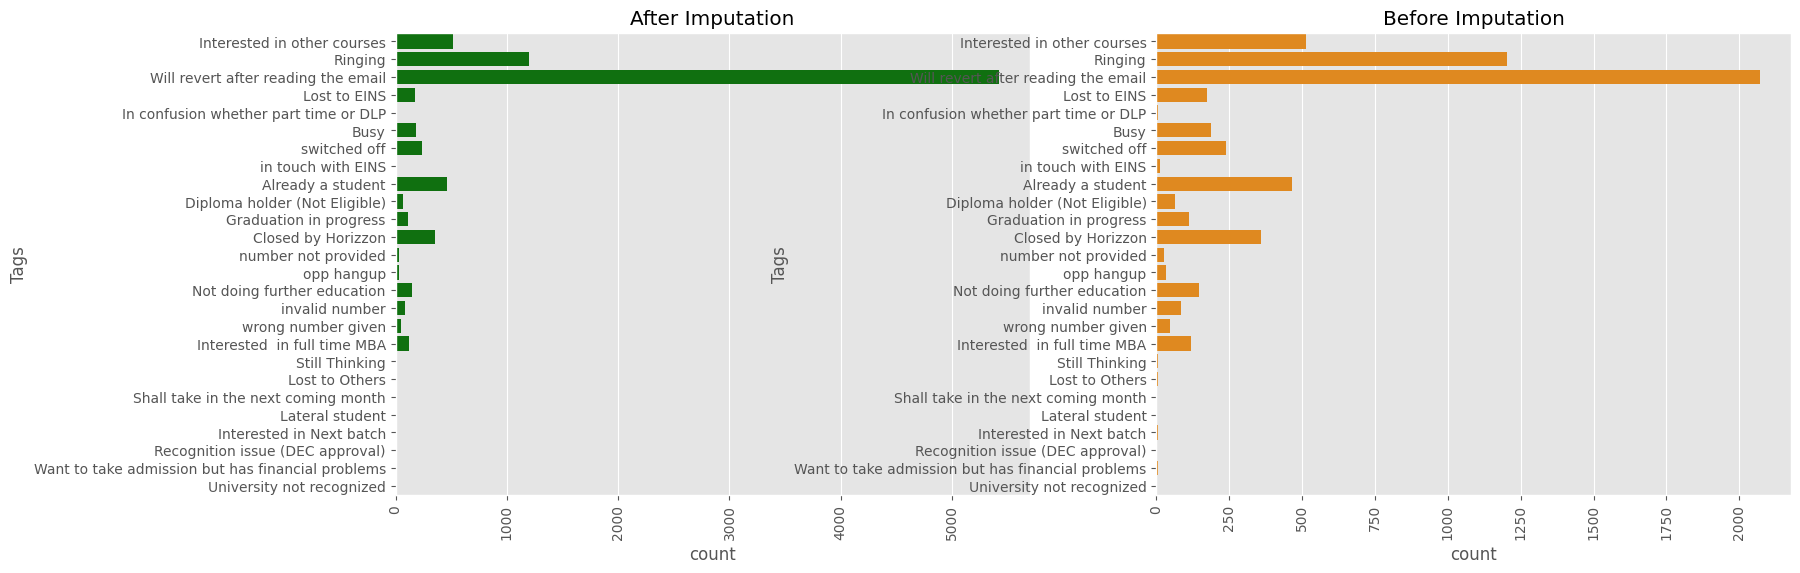

In [ ]:
plt.figure(figsize=(18,6))
plt.subplot(121)
plt.title("After Imputation")
sns.countplot(y=cat__copy['Tags'].fillna("Will revert after reading the email"), color = 'g')
plt.xticks(rotation = "vertical")
plt.subplot(122)
plt.title("Before Imputation")
sns.countplot(y=cat__copy['Tags'], color = 'darkorange')
plt.xticks(rotation = "vertical")
plt.show()

In [ ]:
pd.set_option('display.max_columns', 500)

In [ ]:
#dropping prospect id as we have lead number so these 2 will be the same for the identification
cat__copy.drop('Prospect ID', axis = 1, inplace = True)

In [ ]:
encoder = OrdinalEncoder()

In [ ]:
temp_df = cat__copy.copy()

In [ ]:
temp_df['Tags'].replace(to_replace = np.nan, value = 'nan', inplace = True)
encode_df = pd.DataFrame(encoder.fit_transform(temp_df), columns = temp_df.columns)
encode_df.Tags.replace(to_replace = 22.0, value = np.nan, inplace = True)
check_str(encode_df, 'Tags')
knn_imputer = KNN(k = 6)

Float/Int Values Found in Categorical Column..!!!


In [ ]:
impute_data = knn_imputer.fit_transform(encode_df)
impute_df = pd.DataFrame(np.round(impute_data, 1), columns = temp_df.columns)
impute_df = pd.DataFrame(encoder.inverse_transform(impute_df), columns = impute_df.columns)
impute_df['Tags'].replace(to_replace = 'nan', value = 'Will revert after reading the email', inplace = True)

Imputing row 1/9240 with 0 missing, elapsed time: 36.878
Imputing row 101/9240 with 0 missing, elapsed time: 36.883
Imputing row 201/9240 with 0 missing, elapsed time: 36.888
Imputing row 301/9240 with 1 missing, elapsed time: 36.894
Imputing row 401/9240 with 0 missing, elapsed time: 36.902
Imputing row 501/9240 with 0 missing, elapsed time: 36.908
Imputing row 601/9240 with 0 missing, elapsed time: 36.914
Imputing row 701/9240 with 0 missing, elapsed time: 36.925
Imputing row 801/9240 with 1 missing, elapsed time: 36.931
Imputing row 901/9240 with 0 missing, elapsed time: 36.938
Imputing row 1001/9240 with 0 missing, elapsed time: 36.943
Imputing row 1101/9240 with 1 missing, elapsed time: 36.948
Imputing row 1201/9240 with 0 missing, elapsed time: 36.956
Imputing row 1301/9240 with 0 missing, elapsed time: 36.963
Imputing row 1401/9240 with 0 missing, elapsed time: 36.970
Imputing row 1501/9240 with 1 missing, elapsed time: 36.975
Imputing row 1601/9240 with 0 missing, elapsed time:

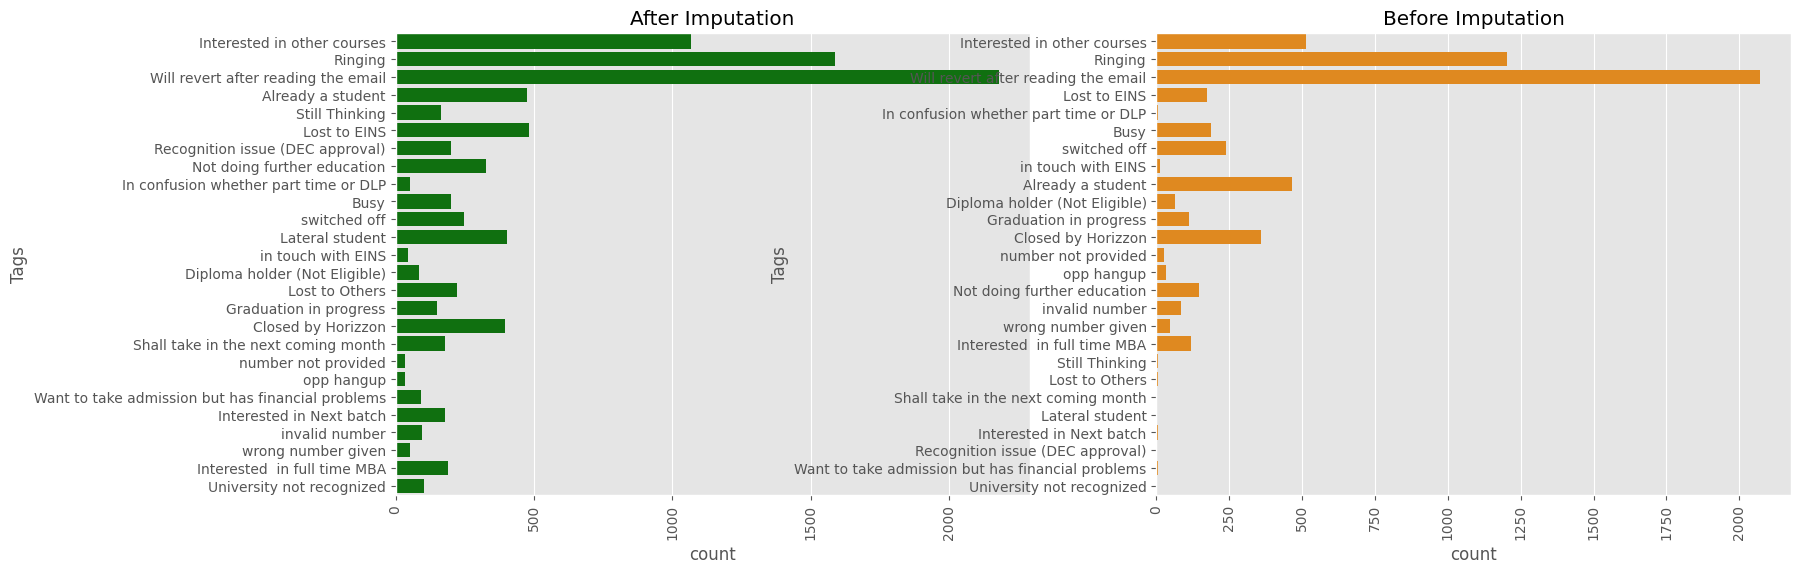

In [ ]:
plt.figure(figsize=(18,6))
plt.subplot(121)
plt.title("After Imputation")
sns.countplot(y=impute_df['Tags'].fillna("Will revert after reading the email"), color = 'g')
plt.xticks(rotation = "vertical")
plt.subplot(122)
plt.title("Before Imputation")
sns.countplot(y=cat__copy['Tags'], color = 'darkorange')
plt.xticks(rotation = "vertical")
plt.show()

In [ ]:
final_df = pd.concat([num_df, impute_df], axis = 1)

In [ ]:
final_df.head()

Lead Number  Converted  TotalVisits  Total Time Spent on Website  \
0       660737          0          0.0                            0   
1       660728          0          5.0                          674   
2       660727          1          2.0                         1532   
3       660719          0          1.0                          305   
4       660681          1          2.0                         1428   

   Page Views Per Visit                                 Tags    Lead Profile  \
0                   0.0          Interested in other courses     Unspecified   
1                   2.5                              Ringing     Unspecified   
2                   2.0  Will revert after reading the email  Potential Lead   
3                   1.0                              Ringing     Unspecified   
4                   1.0  Will revert after reading the email     Unspecified   

  What matters most to you in choosing a course  \
0                       Better Career Prospects   
1                       Better Career Prospects   
2                       Better Career Prospects   
3                       Better Career Prospects   
4                       Better Career Prospects   

  What is your current occupation How did you hear about X Education  \
0                      Unemployed                        Unspecified   
1                      Unemployed                        Unspecified   
2                         Student                        Unspecified   
3                      Unemployed                      Word Of Mouth   
4                      Unemployed                              Other   

            Specialization         City            Last Activity  \
0              Unspecified  Unspecified  Page Visited on Website   
1              Unspecified  Unspecified             Email Opened   
2  Business Administration       Mumbai             Email Opened   
3    Media and Advertising       Mumbai              Unreachable   
4              Unspecified       Mumbai        Converted to Lead   

      Lead Source              Lead Origin Do Not Email Do Not Call Search  \
0      Olark Chat                      API           No          No     No   
1  Organic Search                      API           No          No     No   
2  Direct Traffic  Landing Page Submission           No          No     No   
3  Direct Traffic  Landing Page Submission           No          No     No   
4          Google  Landing Page Submission           No          No     No   

  Magazine Newspaper Article X Education Forums Newspaper  \
0       No                No                 No        No   
1       No                No                 No        No   
2       No                No                 No        No   
3       No                No                 No        No   
4       No                No                 No        No   

  Digital Advertisement Through Recommendations  \
0                    No                      No   
1                    No                      No   
2                    No                      No   
3                    No                      No   
4                    No                      No   

  Receive More Updates About Our Courses Update me on Supply Chain Content  \
0                                     No                                No   
1                                     No                                No   
2                                     No                                No   
3                                     No                                No   
4                                     No                                No   

  Get updates on DM Content I agree to pay the amount through cheque  \
0                        No                                       No   
1                        No                                       No   
2                        No                                       No   
3                        No                   

In [ ]:
final_df = final_df.iloc[:, [0,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29, 1]]

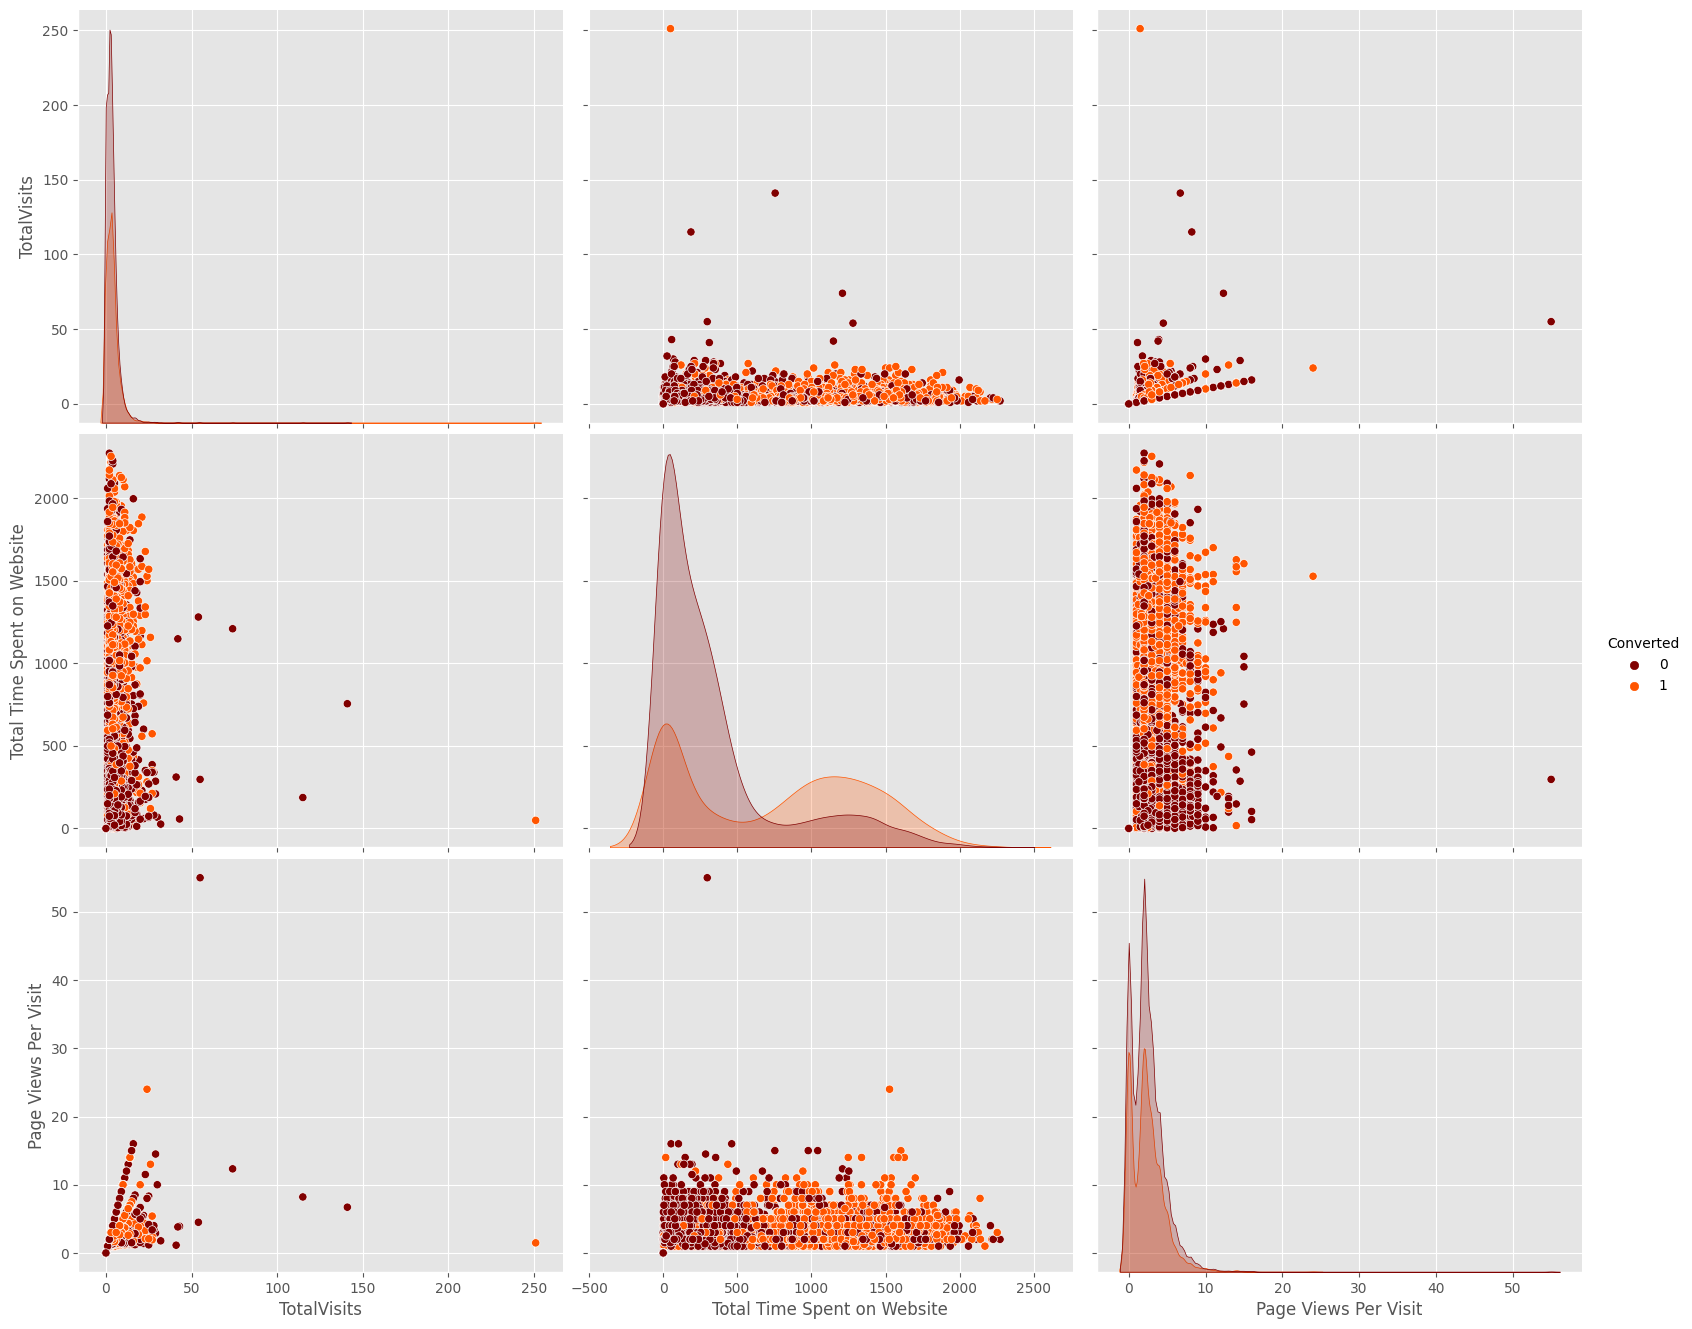

In [ ]:
sns.pairplot(final_df.iloc[:, [1,2,3,-1]], hue = 'Converted', palette = 'gist_heat', height = 4.5, aspect = 1.2)

Observation on Data Skewness and Outliers:

- Evident skewness and potential outliers are observed in the data, particularly when considering different classes.
- Addressing both skewness and outliers is essential for maintaining the integrity of the dataset and facilitating more accurate analyses and model building.

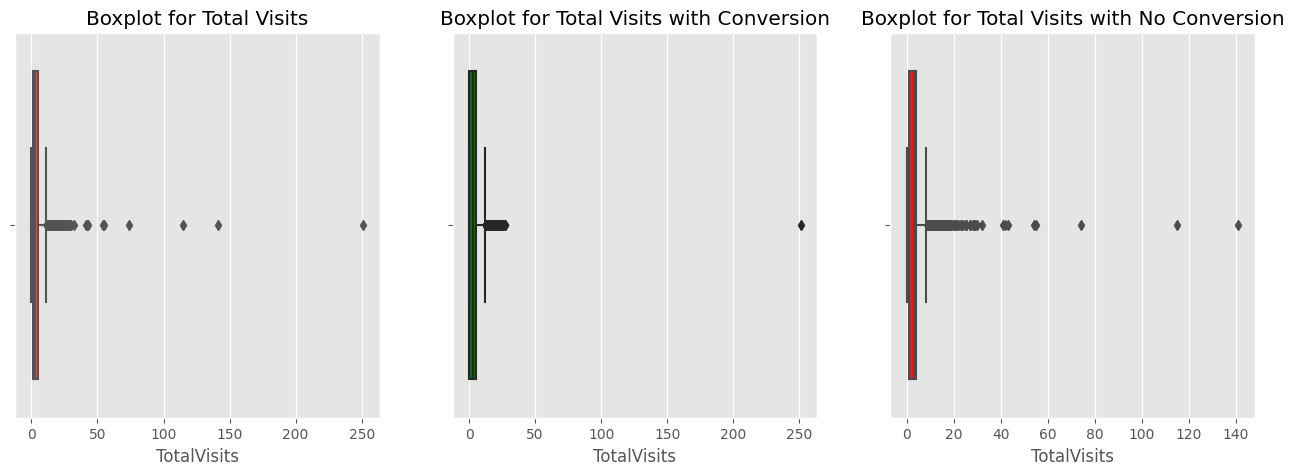

In [ ]:
plt.figure(figsize=(16,5))
plt.subplot(131)
plt.title("Boxplot for Total Visits")
sns.boxplot(data = final_df, x = 'TotalVisits')
plt.subplot(132)
plt.title("Boxplot for Total Visits with Conversion")
sns.boxplot(data = final_df.query("Converted == 1"), x = 'TotalVisits', hue = 'Converted', color = 'g')
plt.subplot(133)
plt.title("Boxplot for Total Visits with No Conversion")
sns.boxplot(data = final_df.query("Converted == 0"), x = 'TotalVisits', hue = 'Converted', color = 'r')
plt.show()

Observation on Total Visits via Boxplot:

- The boxplot highlights the presence of high extreme values in the **"Total Visits"** variable.
- Addressing these extreme values is crucial to ensure the reliability and accuracy of subsequent analyses, particularly in the context of the overall distribution.

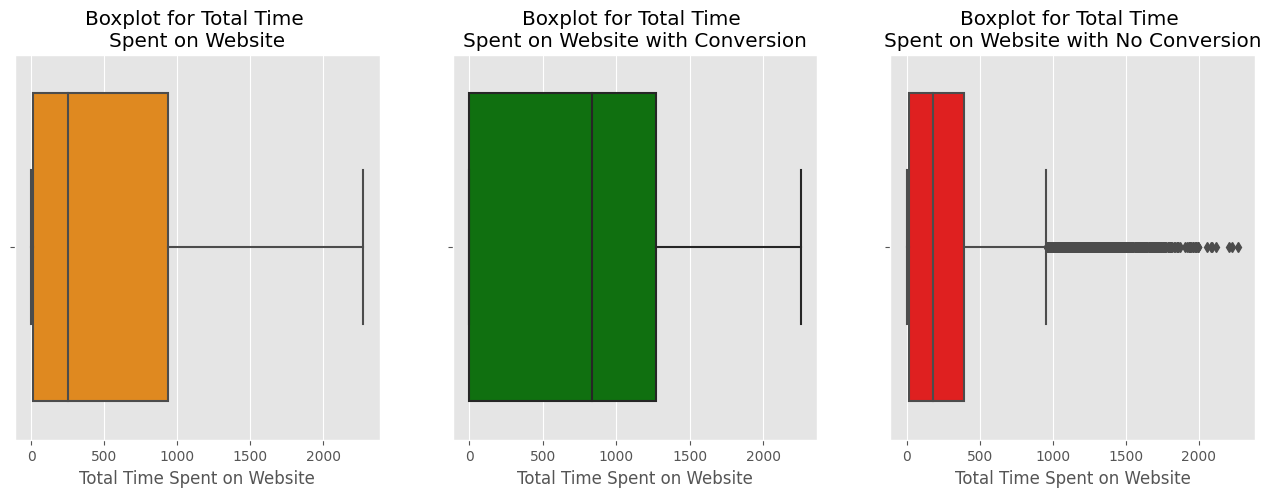

In [ ]:
plt.figure(figsize=(16,5))
plt.subplot(131)
plt.title("Boxplot for Total Time \nSpent on Website")
sns.boxplot(data = final_df, x = 'Total Time Spent on Website', color = 'darkorange')
plt.subplot(132)
plt.title("Boxplot for Total Time \nSpent on Website with Conversion")
sns.boxplot(data = final_df.query("Converted == 1"), x = 'Total Time Spent on Website', hue = 'Converted', color = 'g')
plt.subplot(133)
plt.title("Boxplot for Total Time \nSpent on Website with No Conversion")
sns.boxplot(data = final_df.query("Converted == 0"), x = 'Total Time Spent on Website', hue = 'Converted', color = 'r')
plt.show()

Observation on Outliers:

- Potential outliers are identified, particularly within the class labeled as **"No Conversion."**
- However, at the aggregate level, the impact of outliers appears to be neutralized, as the distribution of the **"Conversion"** class is less skewed compared to the **"No Conversion"** class.

Insight:

- The overall class distribution and imbalance should be considered while handling outliers, as their impact may be mitigated when analyzed collectively.

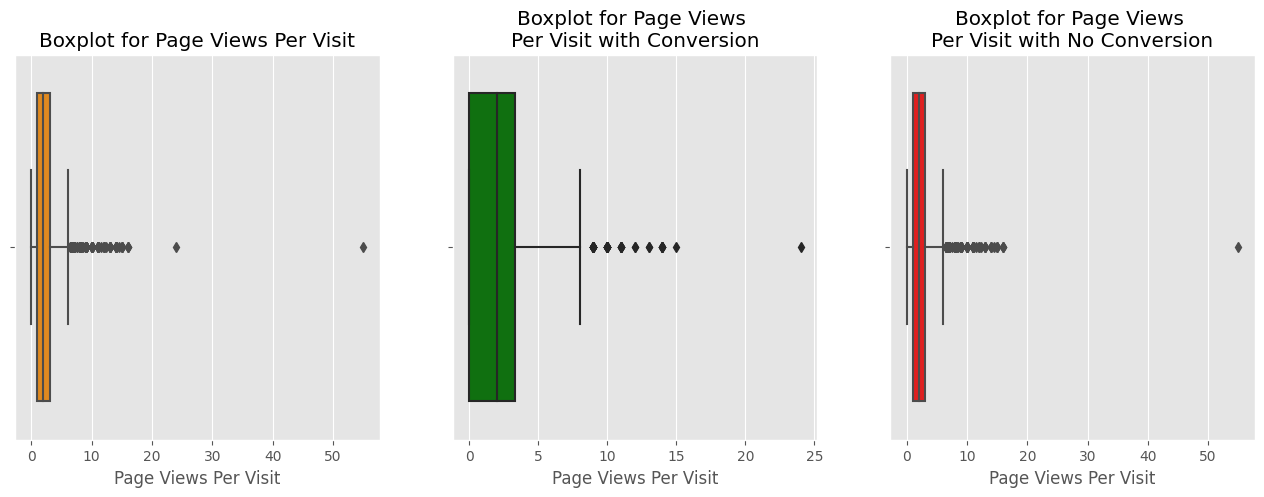

In [ ]:
plt.figure(figsize=(16,5))
plt.subplot(131)
plt.title("Boxplot for Page Views Per Visit")
sns.boxplot(data = final_df, x = 'Page Views Per Visit', color = 'darkorange')
plt.subplot(132)
plt.title("Boxplot for Page Views \nPer Visit with Conversion")
sns.boxplot(data = final_df.query("Converted == 1"), x = 'Page Views Per Visit', hue = 'Converted', color = 'g')
plt.subplot(133)
plt.title("Boxplot for Page Views \nPer Visit with No Conversion")
sns.boxplot(data = final_df.query("Converted == 0"), x = 'Page Views Per Visit', hue = 'Converted', color = 'r')
plt.show()

Identification of Outliers:

- Noting the presence of extreme values in the data, it becomes imperative to address these outliers before advancing with further analysis.

Action Plan:

- Implement outlier detection techniques to identify and subsequently handle extreme values appropriately.
- Outlier correction ensures the reliability and robustness of subsequent analytical processes.

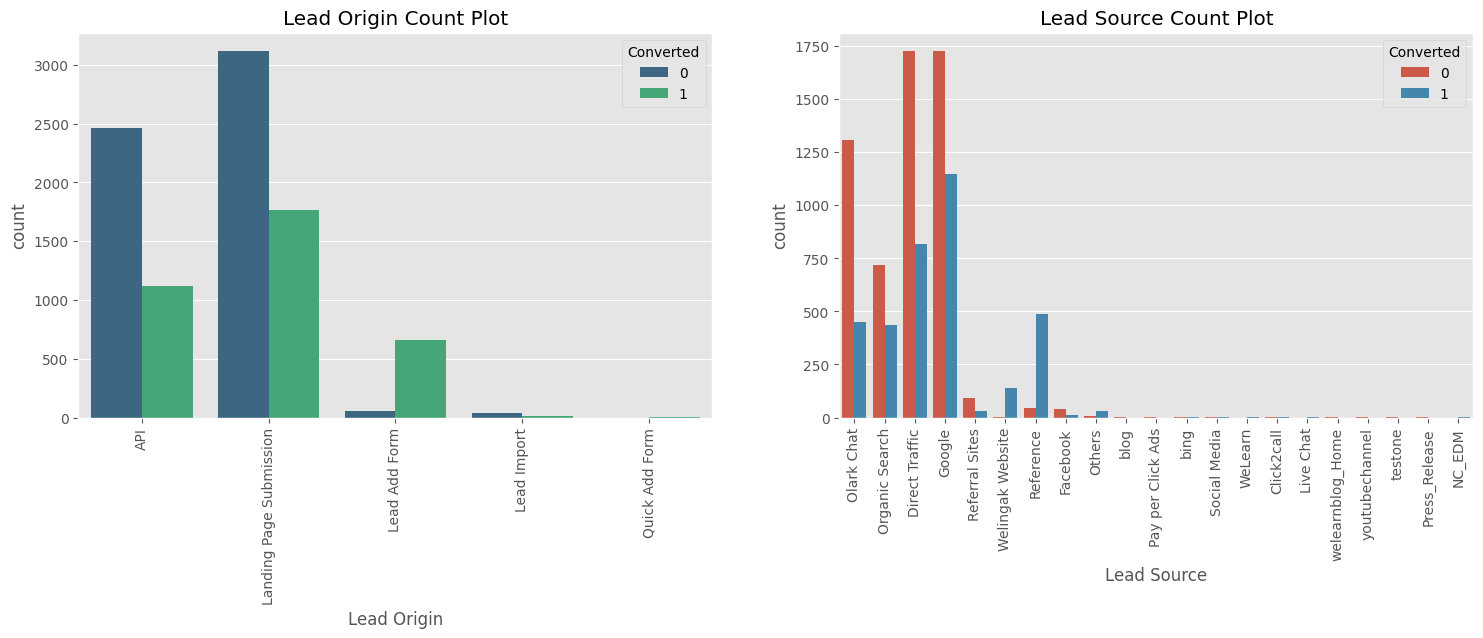

In [ ]:
plt.figure(figsize=(18,5))
plt.subplot(121)
plt.title("Lead Origin Count Plot")
sns.countplot(data = final_df, x = 'Lead Origin', hue = 'Converted', palette = 'viridis')
plt.xticks(rotation = 'vertical')
plt.subplot(122)
plt.title("Lead Source Count Plot")
sns.countplot(data = final_df, x = 'Lead Source', hue = 'Converted')
plt.xticks(rotation = 'vertical')
plt.show()

In [ ]:
px.parallel_categories(data_frame = final_df, dimensions = ["Lead Source", "Lead Origin", "Converted"],
                       color = 'Page Views Per Visit', color_continuous_scale=px.colors.diverging.Geyser,
                       color_continuous_midpoint=25)

Analysis on Lead Source and Lead Origin Relationship:

- Users from the "Olark Chat" source predominantly have a lead origin of "API," and a significant portion of them did not convert.
- In contrast, users sourced from "Reference" typically have a lead origin of "Lead Add Form," with a higher conversion rate.

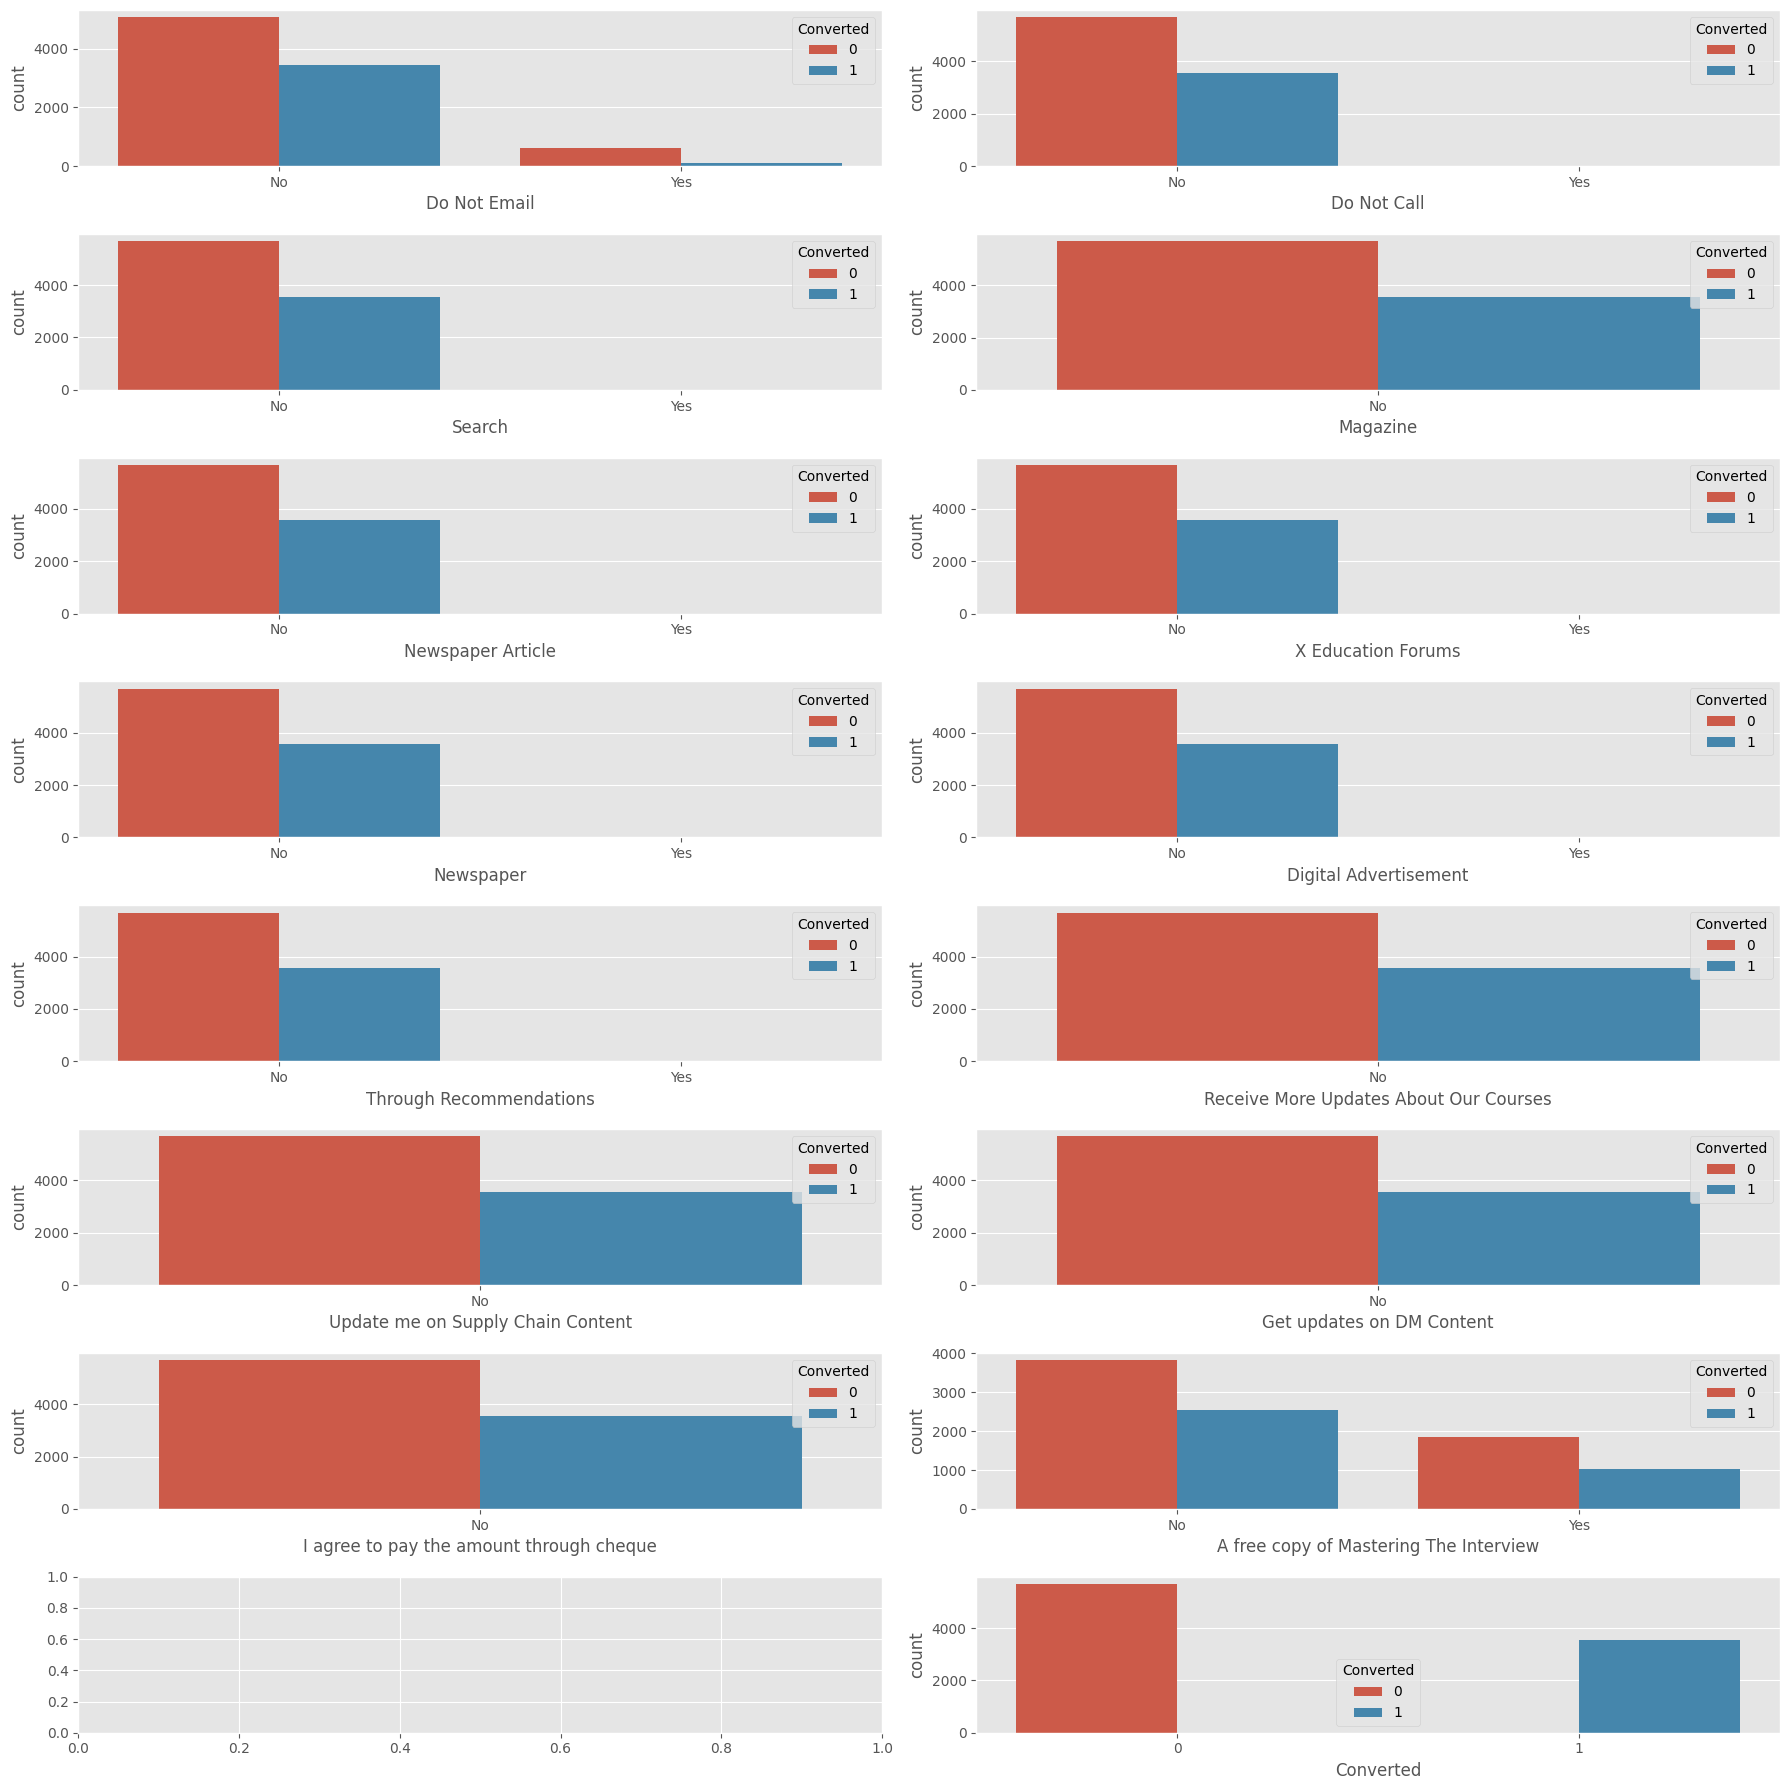

In [ ]:
fig, ax = plt.subplots(8, 2, figsize=(18,18))
axes_ = [axes_row for axes in ax for axes_row in axes]

for idx, val in enumerate(final_df.iloc[:, 14:].columns):
    if val == 'Last Notable Activity':
        continue
    else:
        g = sns.countplot(data = final_df, x = val, hue = 'Converted', ax = axes_[idx])
        plt.tight_layout()

Key Observations:

- Proportionally, the number of users who did not convert is notably higher than those who converted.
- Despite expectations, there is limited interest in the offer of a **"Free Copy of Mastering the Interview."**
- This behavior might be attributed to a significant audience segment being "Unemployed," prioritizing upskilling over interview preparation in the early stages.
- Certain columns with predominantly "No" values may not contribute substantial information and are candidates for removal in subsequent stages of analysis.

### Outlier Analysis

In [ ]:
def check_outlier(data, col):

    #calculating quartile deviation
    q1 = np.quantile(data[col], q = 0.25)
    q3 = np.quantile(data[col], q = 0.75)

    #calculating inter-quartile range
    iqr = q3-q1

    #calculating lower and upper bound
    lower_bound = q1 - 1.5*iqr
    upper_bound = q3 + 1.5*iqr

    #filtering data with outliers
    outlier = data[col][(data[col] < lower_bound) | (data[col] > upper_bound)]

    #plotting the result
    plt.figure(figsize=(14,8))
    plt.subplot(211)
    plt.title("%s with Outliers" %(col))
    plt.plot(data[col])
    sns.scatterplot(data = outlier, x = outlier.index, y = outlier.values, marker = 'X', color = 'k', s=70)
    plt.subplot(212)
    sns.boxplot(data = data, x = col, color = 'g')
    plt.show()

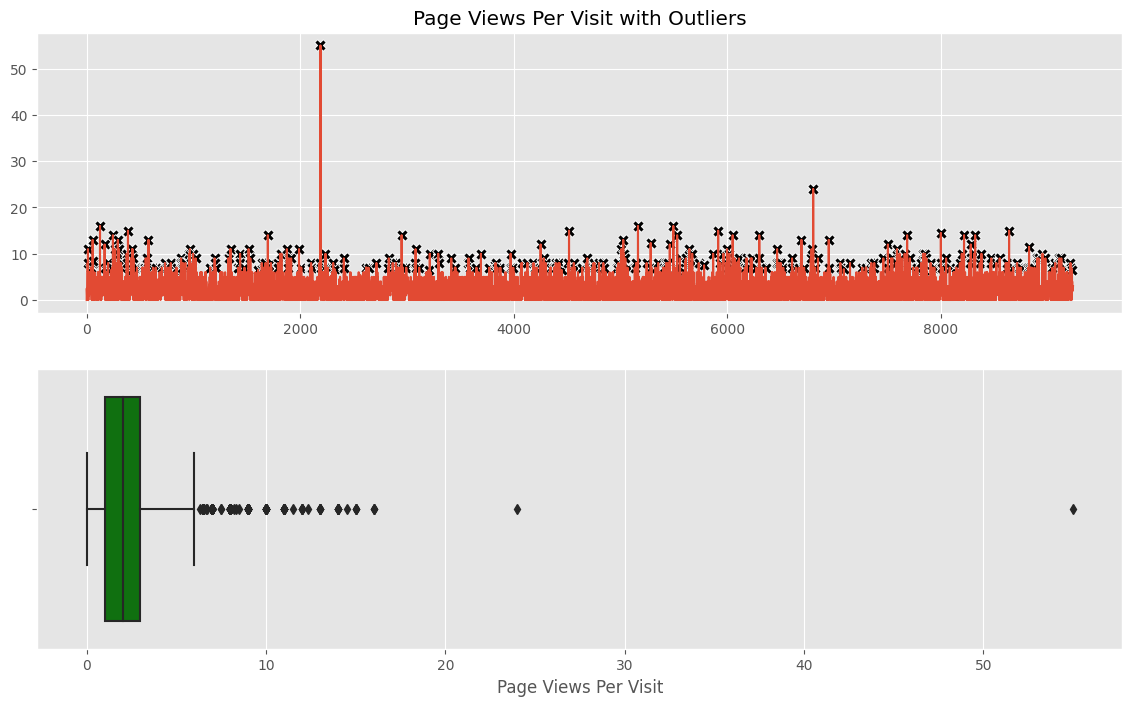

In [ ]:
check_outlier(final_df, 'Page Views Per Visit')

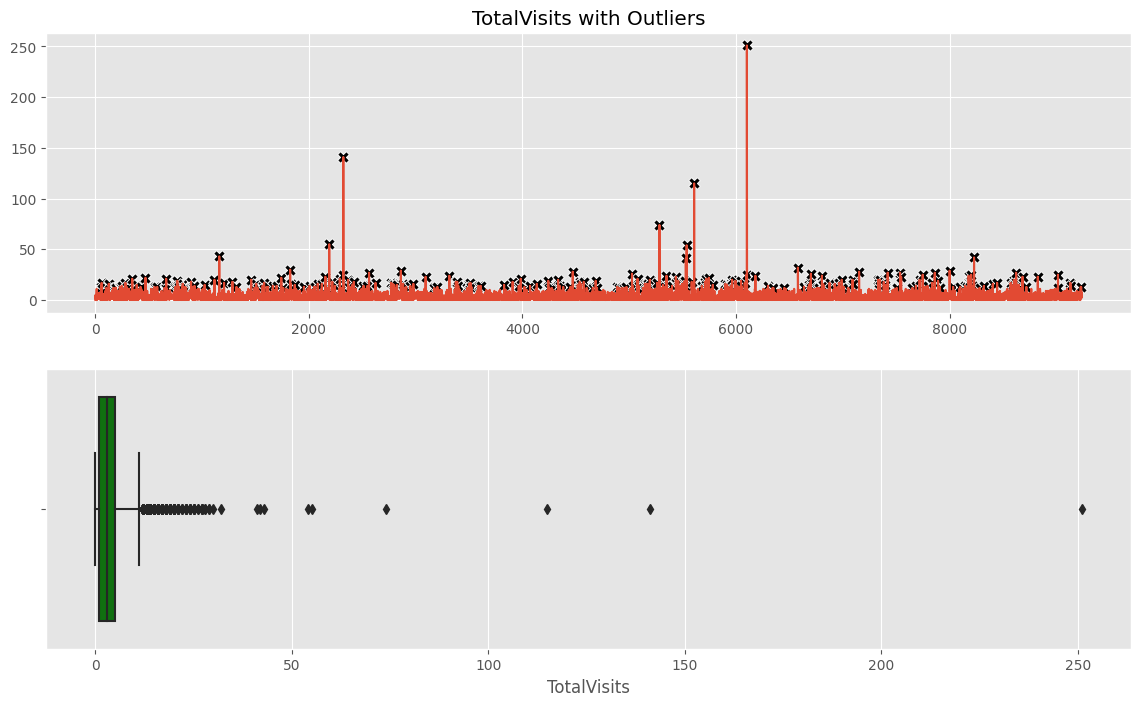

In [ ]:
check_outlier(final_df, 'TotalVisits')

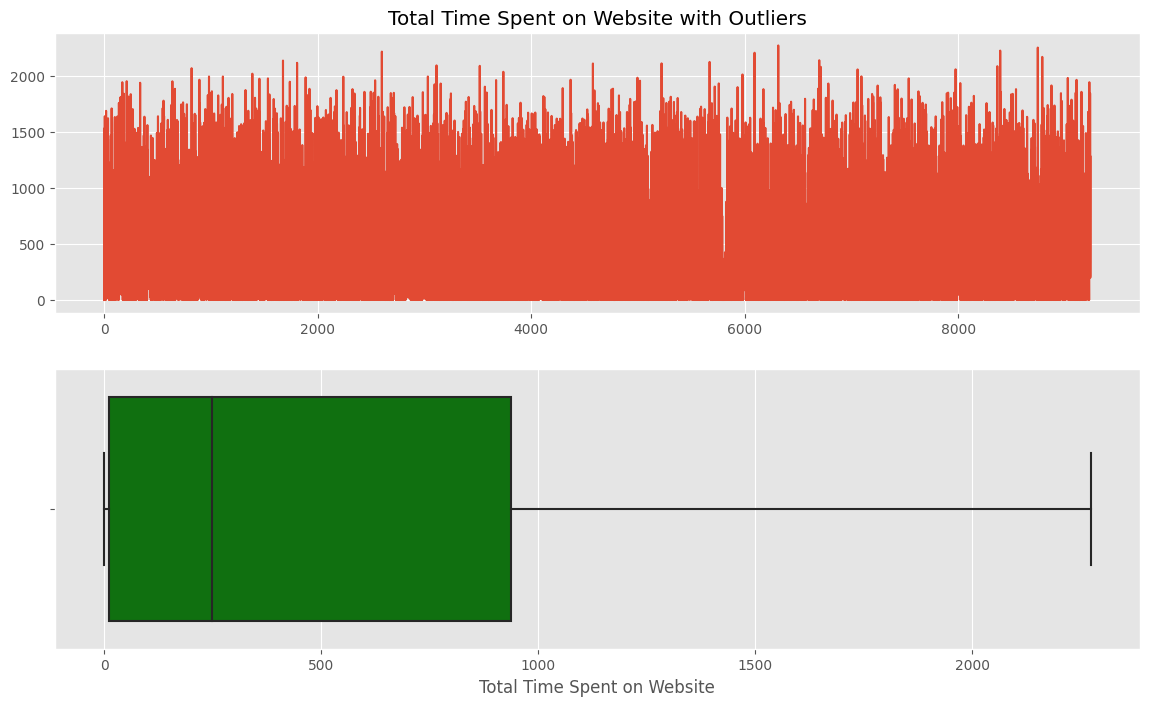

In [ ]:
check_outlier(final_df, 'Total Time Spent on Website')

In [ ]:
final_df.iloc[:, [1,2,3]].describe(percentiles = [0.01, 0.1, 0.25, 0.75, 0.90, 0.95, 0.99]).T

count        mean         std  min   1%  10%  \
TotalVisits                  9240.0    3.438636    4.819024  0.0  0.0  0.0   
Total Time Spent on Website  9240.0  487.698268  548.021466  0.0  0.0  0.0   
Page Views Per Visit         9240.0    2.357440    2.145781  0.0  0.0  0.0   

                              25%    50%    75%     90%     95%      99%  \
TotalVisits                   1.0    3.0    5.0     7.0    10.0    17.00   
Total Time Spent on Website  12.0  248.0  936.0  1380.0  1562.0  1840.61   
Page Views Per Visit          1.0    2.0    3.0     5.0     6.0     9.00   

                                max  
TotalVisits                   251.0  
Total Time Spent on Website  2272.0  
Page Views Per Visit           55.0

Identification of Data Irregularities:

- Noticeable irregularities are observed, particularly in the abrupt increase of values from the 99th percentile to the maximum.
- This sudden shift in values can result in a skewed distribution, emphasizing the need for corrective measures to ensure a more representative and reliable dataset.

In [ ]:
anomaly_data = final_df.iloc[:, [1,2,3]]
y = final_df.iloc[:, -1]
se = StandardScaler()
le = LogisticRegression(random_state = 42)
scaled_df = pd.DataFrame(se.fit_transform(anomaly_data), columns = anomaly_data.columns)
contamination = [0.1,0.01,0.001,0.05,0.005,0.0001]
k_neighbor = [3,5,7,9, 12, 15, 18, 21, 25]
lof_params = list(product(contamination, k_neighbor))
scores = []

In [ ]:
for c, k in lof_params:

    lof = LocalOutlierFactor(n_neighbors=k, contamination=c, n_jobs = -1)
    predict = lof.fit_predict(scaled_df)
    mask = pd.DataFrame(predict)
    mask.columns = ["anomaly"]
    filter_df = pd.concat([scaled_df, mask], axis = 1).query('anomaly == 1').reset_index().drop("index", axis = 1)
    filter_y = pd.concat([y, mask], axis = 1).query('anomaly == 1').reset_index().drop("index", axis = 1)
    filter_df = filter_df.iloc[:, :3]
    filter_y = filter_y.iloc[:, :1]
    cv_score = cross_val_score(estimator= le, X = filter_df, y = filter_y, cv = 10, scoring = 'accuracy')
    scores.append(np.mean(cv_score))
    print(np.mean(cv_score))

0.7104753887808941
0.713086642599278
0.7124852471535684
0.7133270272146626
0.7135679903730445
0.7142884210404518
0.7141680840970102
0.7122792858465241
0.7130853408775341
0.7151746724890831
0.716521385610599
0.7157565974339659
0.7160848250050819
0.7158663653429947
0.7165219834750272
0.7164124547117696
0.7157563582881945
0.7153191998182491
0.7158179848320694
0.7157374315825019
0.7163596966413868
0.7164680390032502
0.7165763813651137
0.7164680390032502
0.7164680390032502
0.7165763813651137
0.7164680390032502
0.7131469105435542
0.7144646924829157
0.7140592410968226
0.7154267629083411
0.7151992322137749
0.7157685784266616
0.7148568972189826
0.7155398789100345
0.7139456056186576
0.7159474578671576
0.7160892037659081
0.7154363201968112
0.7157625254293418
0.7157625254293418
0.7159803898377253
0.7157628802573686
0.7157627619813597
0.7156537115011591
0.7162049218387245
0.7161255411255412
0.7160966967304996
0.7160966967304996
0.7162049218387246
0.7162049218387246
0.7162049218387246
0.716204921838

In [ ]:
param_df = pd.DataFrame(lof_params, columns = ["contamination", "neighbors"])
scores_df = pd.DataFrame(scores, columns = ["scores"])
lof_perf_df = pd.concat([param_df, scores_df], axis = 1)
lof_pivot = pd.pivot_table(data = lof_perf_df, index = 'contamination', columns = 'neighbors', values = 'scores')


In [ ]:
lof_pivot

neighbors            3         5         7         9         12        15  \
contamination                                                               
0.0001         0.716205  0.716126  0.716097  0.716097  0.716205  0.716205   
0.0010         0.715818  0.715737  0.716360  0.716468  0.716576  0.716468   
0.0050         0.715947  0.716089  0.715436  0.715763  0.715763  0.715980   
0.0100         0.715175  0.716521  0.715757  0.716085  0.715866  0.716522   
0.0500         0.713147  0.714465  0.714059  0.715427  0.715199  0.715769   
0.1000         0.710475  0.713087  0.712485  0.713327  0.713568  0.714288   

neighbors            18        21        25  
contamination                                
0.0001         0.716205  0.716205  0.716205  
0.0010         0.716468  0.716576  0.716468  
0.0050         0.715763  0.715763  0.715654  
0.0100         0.716412  0.715756  0.715319  
0.0500         0.714857  0.715540  0.713946  
0.1000         0.714168  0.712279  0.713085

<Axes: xlabel='neighbors', ylabel='contamination'>

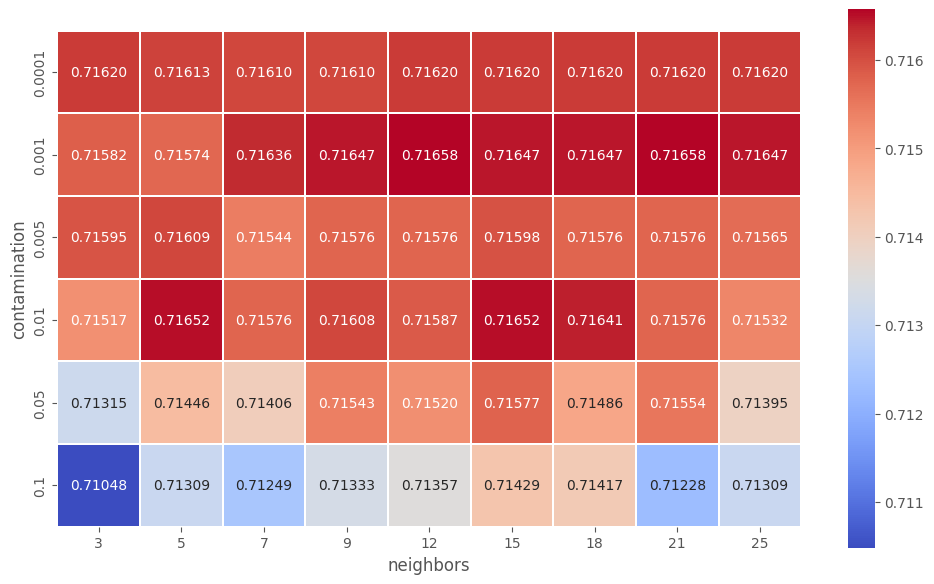

In [ ]:
plt.figure(figsize=(12,7))
sns.heatmap(lof_pivot, annot = True, fmt = ".5f", cmap = 'coolwarm', square = True, linewidths=0.025)

In [ ]:
lof = LocalOutlierFactor(contamination=0.001, n_neighbors=21, n_jobs = -1)
lof_fit = lof.fit_predict(scaled_df)
anomaly_label = pd.DataFrame(lof_fit, columns = ["anomaly"])
final_df.loc[:, "anomaly"] = anomaly_label

In [ ]:
final_df.head()

Lead Number  TotalVisits  Total Time Spent on Website  \
0       660737          0.0                            0   
1       660728          5.0                          674   
2       660727          2.0                         1532   
3       660719          1.0                          305   
4       660681          2.0                         1428   

   Page Views Per Visit                                 Tags    Lead Profile  \
0                   0.0          Interested in other courses     Unspecified   
1                   2.5                              Ringing     Unspecified   
2                   2.0  Will revert after reading the email  Potential Lead   
3                   1.0                              Ringing     Unspecified   
4                   1.0  Will revert after reading the email     Unspecified   

  What matters most to you in choosing a course  \
0                       Better Career Prospects   
1                       Better Career Prospects   
2                       Better Career Prospects   
3                       Better Career Prospects   
4                       Better Career Prospects   

  What is your current occupation How did you hear about X Education  \
0                      Unemployed                        Unspecified   
1                      Unemployed                        Unspecified   
2                         Student                        Unspecified   
3                      Unemployed                      Word Of Mouth   
4                      Unemployed                              Other   

            Specialization         City            Last Activity  \
0              Unspecified  Unspecified  Page Visited on Website   
1              Unspecified  Unspecified             Email Opened   
2  Business Administration       Mumbai             Email Opened   
3    Media and Advertising       Mumbai              Unreachable   
4              Unspecified       Mumbai        Converted to Lead   

      Lead Source              Lead Origin Do Not Email Do Not Call Search  \
0      Olark Chat                      API           No          No     No   
1  Organic Search                      API           No          No     No   
2  Direct Traffic  Landing Page Submission           No          No     No   
3  Direct Traffic  Landing Page Submission           No          No     No   
4          Google  Landing Page Submission           No          No     No   

  Magazine Newspaper Article X Education Forums Newspaper  \
0       No                No                 No        No   
1       No                No                 No        No   
2       No                No                 No        No   
3       No                No                 No        No   
4       No                No                 No        No   

  Digital Advertisement Through Recommendations  \
0                    No                      No   
1                    No                      No   
2                    No                      No   
3                    No                      No   
4                    No                      No   

  Receive More Updates About Our Courses Update me on Supply Chain Content  \
0                                     No                                No   
1                                     No                                No   
2                                     No                                No   
3                                     No                                No   
4                                     No                                No   

  Get updates on DM Content I agree to pay the amount through cheque  \
0                        No                                       No   
1                        No                                       No   
2                        No                                       No   
3                        No                                       No   
4                        No             

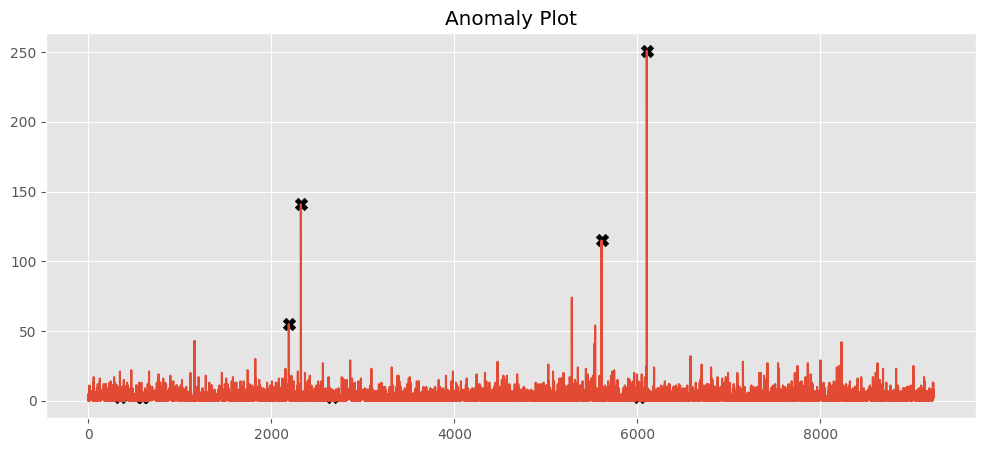

In [ ]:
plt.figure(figsize=(12,5))
plt.title("Anomaly Plot")
plt.plot(final_df["TotalVisits"])
plt.scatter(x = final_df[final_df["anomaly"] == -1]["TotalVisits"].index, y = final_df[final_df["anomaly"] == -1]["TotalVisits"].values, marker = "X", color = 'k', s = 80)

In [ ]:
anomaly_idx = final_df[final_df["anomaly"] == -1].index
final_df.shape
filter_df = final_df.drop(anomaly_idx, axis = 0).reset_index().drop("index", axis = 1)
filter_df.drop("anomaly", axis = 1, inplace = True)
filter_df.iloc[:, :-1].describe()

Lead Number  TotalVisits  Total Time Spent on Website  \
count    9230.000000  9230.000000                  9230.000000   
mean   617169.918960     3.379523                   488.069339   
std     23401.760534     3.594001                   548.153831   
min    579533.000000     0.000000                     0.000000   
25%    596475.750000     1.000000                    12.000000   
50%    615470.500000     3.000000                   249.000000   
75%    637372.250000     5.000000                   936.750000   
max    660737.000000    74.000000                  2272.000000   

       Page Views Per Visit  
count           9230.000000  
mean               2.350959  
std                2.074395  
min                0.000000  
25%                1.000000  
50%                2.000000  
75%                3.000000  
max               24.000000

Outlier Handling Approach:

- Identified and removed extreme outliers using Local Outlier Factor (LOF).
- Despite some remaining extreme values evident in the boxplot, a decision has been made to retain them for the initial model building.
- Monitoring model performance, and considering further adjustments, such as additional outlier removal or winsorization, if necessary, in response to the model's performance.

In [ ]:
drop_cols = ["Do Not Call", "Search", "Magazine", "Newspaper Article", "X Education Forums", "Newspaper",
             "Digital Advertisement", "Through Recommendations", "Receive More Updates About Our Courses",
            "Update me on Supply Chain Content", "Get updates on DM Content", "I agree to pay the amount through cheque"]


In [ ]:
filter_df.drop(drop_cols, axis = 1, inplace = True)

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [ ]:
cat_feature = filter_df.dtypes[filter_df.dtypes == 'object'].keys()

In [ ]:
cat_feature

Index(['Tags', 'Lead Profile', 'What matters most to you in choosing a course',
       'What is your current occupation', 'How did you hear about X Education',
       'Specialization', 'City', 'Last Activity', 'Lead Source', 'Lead Origin',
       'Do Not Email', 'A free copy of Mastering The Interview',
       'Last Notable Activity'],
      dtype='object')

In [ ]:
num_feature = filter_df.dtypes[(filter_df.dtypes == 'int64') | (filter_df.dtypes == 'float64')].keys()[[1,2,3]]

In [ ]:
num_feature

Index(['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit'], dtype='object')

In [ ]:
se = StandardScaler()

In [ ]:
encode_num = pd.DataFrame(se.fit_transform(filter_df[num_feature]), columns = num_feature)

In [ ]:
famd_df = pd.concat([encode_num, filter_df[cat_feature]], axis = 1)

### Dimension Reduction(Factor Analysis for Mixed Data)

In [ ]:
from prince import FAMD

In [ ]:
inertia = []

In [ ]:
n_components = np.arange(2,101,1)

In [ ]:
for i in n_components:
    famd = FAMD(n_components=i, random_state=101).fit(famd_df)
    inertia.append(famd.eigenvalues_)

In [ ]:
cumsum_inertia = []
for i in inertia:
    cumsum_inertia.append(np.sum(i)*100)

In [ ]:
px.area(y = cumsum_inertia, x = n_components, title = "Inertia v/s Components")

Challenge with High-Dimensional Dataset:

The dataset's high dimensionality poses computational challenges for several algorithms due to increased computational costs.
Dimensionality reduction methods might lead to information loss, which is undesirable.
A need exists to explore alternative techniques that can effectively handle the high-dimensional nature of the dataset without sacrificing significant information.

In [ ]:
encoded_cat_df = pd.get_dummies(filter_df[cat_feature], drop_first = True)
final_encoded_df = pd.concat([encode_num, encoded_cat_df], axis = 1)

In [ ]:
final_encoded_df.head()

TotalVisits  Total Time Spent on Website  Page Views Per Visit  Tags_Busy  \
0    -0.940374                    -0.890436             -1.133384          0   
1     0.450908                     0.339213              0.071852          0   
2    -0.383861                     1.904552             -0.169195          0   
3    -0.662118                    -0.333992             -0.651290          0   
4    -0.383861                     1.714813             -0.651290          0   

   Tags_Closed by Horizzon  Tags_Diploma holder (Not Eligible)  \
0                        0                                   0   
1                        0                                   0   
2                        0                                   0   
3                        0                                   0   
4                        0                                   0   

   Tags_Graduation in progress  Tags_In confusion whether part time or DLP  \
0                            0                                           0   
1                            0                                           0   
2                            0                                           0   
3                            0                                           0   
4                            0                                           0   

   Tags_Interested  in full time MBA  Tags_Interested in Next batch  \
0                                  0                              0   
1                                  0                              0   
2                                  0                              0   
3                                  0                              0   
4                                  0                              0   

   Tags_Interested in other courses  Tags_Lateral student  Tags_Lost to EINS  \
0                                 1                     0                  0   
1                                 0                     0                  0   
2                                 0                     0                  0   
3                                 0                     0                  0   
4                                 0                     0                  0   

   Tags_Lost to Others  Tags_Not doing further education  \
0                    0                                 0   
1                    0                                 0   
2                    0                                 0   
3                    0                                 0   
4                    0                                 0   

   Tags_Recognition issue (DEC approval)  Tags_Ringing  \
0                                      0             0   
1                                      0             1   
2                                      0             0   
3                                      0             1   
4                                      0             0   

   Tags_Shall take in the next coming month  Tags_Still Thinking  \
0                                         0                    0   
1                                         0                    0   
2                                         0                    0   
3                                         0                    0   
4                                         0                    0   

   Tags_University not recognized  \
0                               0   
1                               0   
2                               0   
3                               0   
4                               0   

   Tags_Want to take admission but has financial problems  \
0                                                  0        
1                                                  0        
2                                                  0        
3                                                  0        
4                                                  0        

   Tags_Will revert after reading the e

In [ ]:
filter_df.iloc[:, -1]

0       0
1       0
2       1
3       0
4       1
       ..
9225    1
9226    0
9227    0
9228    1
9229    1
Name: Converted, Length: 9230, dtype: int64

In [ ]:
importances = mutual_info_classif(final_encoded_df, filter_df.iloc[:, -1])
mutual_score = pd.DataFrame([ final_encoded_df.columns, importances], index = ["Features", "Importance"]).T.sort_values(by = "Importance", ascending = False).reset_index().drop("index", axis = 1)
low_score_col = mutual_score[mutual_score["Importance"] == 0].Features.values
high_score_col = mutual_score[mutual_score["Importance"] > 0].Features.values
classif_data = final_encoded_df[high_score_col]
X = classif_data
y = filter_df.iloc[:, -1]

In [ ]:
train, test = train_test_split(pd.concat([X, y], axis = 1), test_size = 0.25)
train.to_csv("/content/drive/MyDrive/LSM_upgrad_case study/train.csv")
test.to_csv("/content/drive/MyDrive/LSM_upgrad_case study/test.csv")